In [1]:
%matplotlib inline
import openmc
import openmc.lib
import openmc.deplete
import math
import numpy as np
import matplotlib.pyplot as plt

[FADILA-MESIA:08282] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.FADILA-MESIA.1000/jf.0/3770155008/shared_mem_cuda_pool.FADILA-MESIA could be created.
[FADILA-MESIA:08282] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


In [2]:
model = openmc.model.Model()

***Define Materials***

In [3]:
uo2 = openmc.Material(name='UO2')
uo2.add_element('U', 1.0, enrichment=4.50, enrichment_type='wo')
uo2.add_element('O', 2.0)
uo2.set_density('g/cc', 10.4)
uo2.temperature = 900

gd2o3n = openmc.Material(name='Gd2O3n') #natural
gd2o3n.add_nuclide('Gd152', 0.0040)
gd2o3n.add_nuclide('Gd154', 0.0436)
gd2o3n.add_nuclide('Gd155', 0.2960)
gd2o3n.add_nuclide('Gd156', 0.4094)
gd2o3n.add_nuclide('Gd157', 0.3130)
gd2o3n.add_nuclide('Gd158', 0.4968)
gd2o3n.add_nuclide('Gd160', 0.4372)
gd2o3n.add_element('O', 3.0)
gd2o3n.set_density('g/cm3', 7.41)
gd2o3n.temperature = 900

# gd2o3 = openmc.Material(name='Gd2O3') #50%
# gd2o3.add_nuclide('Gd152', 0.00288)
# gd2o3.add_nuclide('Gd154', 0.03134)
# gd2o3.add_nuclide('Gd155', 0.48604)
# gd2o3.add_nuclide('Gd156', 0.29432)
# gd2o3.add_nuclide('Gd157', 0.51396)
# gd2o3.add_nuclide('Gd158', 0.35715)
# gd2o3.add_nuclide('Gd160', 0.31431)
# gd2o3.add_element('O', 3.0)
# gd2o3.set_density('g/cm3', 7.41)
# gd2o3.temperature = 900

# gd2o3n = openmc.Material(name='Gd2O3n') #90%
# gd2o3n.add_nuclide('Gd152', 0.00058)
# gd2o3n.add_nuclide('Gd154', 0.00627)
# gd2o3n.add_nuclide('Gd155', 0.87488)
# gd2o3n.add_nuclide('Gd156', 0.05886)
# gd2o3n.add_nuclide('Gd157', 0.92512)
# gd2o3n.add_nuclide('Gd158', 0.07143)
# gd2o3n.add_nuclide('Gd160', 0.06286)
# gd2o3n.add_element('O', 3.0)
# gd2o3n.set_density('g/cm3', 7.41)
# gd2o3n.temperature = 900

# gd2o3 = openmc.Material(name='Gd2O3') #80%
# gd2o3.add_nuclide('Gd152', 0.00115)
# gd2o3.add_nuclide('Gd154', 0.01254)
# gd2o3.add_nuclide('Gd155', 0.77767)
# gd2o3.add_nuclide('Gd156', 0.11773)
# gd2o3.add_nuclide('Gd157', 0.82233)
# gd2o3.add_nuclide('Gd158', 0.14286)
# gd2o3.add_nuclide('Gd160', 0.12572)
# gd2o3.add_element('O', 3.0)
# gd2o3.set_density('g/cm3', 7.41)
# gd2o3.temperature = 900

gd2o3_70 = openmc.Material(name='Gd2O3 70') #70%
gd2o3_70.add_nuclide('Gd152', 0.00173)
gd2o3_70.add_nuclide('Gd154', 0.01881)
gd2o3_70.add_nuclide('Gd155', 0.68046)
gd2o3_70.add_nuclide('Gd156', 0.17659)
gd2o3_70.add_nuclide('Gd157', 0.71954)
gd2o3_70.add_nuclide('Gd158', 0.21429)
gd2o3_70.add_nuclide('Gd160', 0.18858)
gd2o3_70.add_element('O', 3.0)
gd2o3_70.set_density('g/cm3', 7.41)
gd2o3_70.temperature = 900

gd2o3_90 = openmc.Material(name='Gd2O3 90') #90%
gd2o3_90.add_nuclide('Gd152', 0.00058)
gd2o3_90.add_nuclide('Gd154', 0.00627)
gd2o3_90.add_nuclide('Gd155', 0.87488)
gd2o3_90.add_nuclide('Gd156', 0.05886)
gd2o3_90.add_nuclide('Gd157', 0.92512)
gd2o3_90.add_nuclide('Gd158', 0.07143)
gd2o3_90.add_nuclide('Gd160', 0.06286)
gd2o3_90.add_element('O', 3.0)
gd2o3_90.set_density('g/cm3', 7.41)
gd2o3_90.temperature = 900

mixfueln = openmc.Material.mix_materials([uo2, gd2o3n], [0.920, 0.080], 'wo', name='Mix UO2 Gd2O3n')
mixfueln.temperature = 900

mixfuel90 = openmc.Material.mix_materials([uo2, gd2o3_90], [0.920, 0.080], 'wo', name='Mix UO2 Gd2O3 90')
mixfuel90.temperature = 900

mixfuel70 = openmc.Material.mix_materials([uo2, gd2o3_70], [0.920, 0.080], 'wo', name='Mix UO2 Gd2O3 70')
mixfuel70.temperature = 900

fuelA01 = openmc.Material(name='Fuel A01')
fuelA01.add_element('U', 1.0, enrichment=4.50, enrichment_type='wo')
fuelA01.add_element('O', 2.0)
fuelA01.set_density('g/cc', 10.4)
fuelA01.temperature = 900

fuelA02 = openmc.Material(name='Fuel A02')
fuelA02.add_element('U', 1.0, enrichment=4.50, enrichment_type='wo')
fuelA02.add_element('O', 2.0)
fuelA02.set_density('g/cc', 10.4)
fuelA02.temperature = 900

fuelB01 = openmc.Material(name='Fuel B01')
fuelB01.add_element('U', 1.0, enrichment=4.50, enrichment_type='wo')
fuelB01.add_element('O', 2.0)
fuelB01.set_density('g/cc', 10.4) 
fuelB01.temperature = 900

fuelB02 = openmc.Material(name='Fuel B02')
fuelB02.add_element('U', 1.0, enrichment=4.50, enrichment_type='wo')
fuelB02.add_element('O', 2.0)
fuelB02.set_density('g/cc', 10.4) 
fuelB02.temperature = 900

fuelC01 = openmc.Material(name='Fuel C01')
fuelC01.add_element('U', 1.0, enrichment=4.50, enrichment_type='wo')
fuelC01.add_element('O', 2.0)
fuelC01.set_density('g/cc', 10.4)
fuelC01.temperature = 900

fuelC02 = openmc.Material(name='Fuel C02')
fuelC02.add_element('U', 1.0, enrichment=4.50, enrichment_type='wo')
fuelC02.add_element('O', 2.0)
fuelC02.set_density('g/cc', 10.4) 
fuelC02.temperature = 900

fuelC03 = openmc.Material(name='Fuel C03')
fuelC03.add_element('U', 1.0, enrichment=2.65, enrichment_type='wo')
fuelC03.add_element('O', 2.0)
fuelC03.set_density('g/cc', 10.4) 
fuelC03.temperature = 900

gap = openmc.Material(name='gap') #helium - PNNL
gap.add_nuclide('He4', 0.999999 )
gap.add_nuclide('He3', 0.000001)
gap.set_density('g/cm3', 0.000166322)
gap.temperature = 600

clad = openmc.Material(name='cladding') #M5 - jurnal
clad.add_element('Zr', 98.86775, 'wo')
clad.add_element('Nb', 1.00, 'wo')
clad.add_element('O', 0.13, 'wo')
clad.add_element('Fe', 0.00225, 'wo')
clad.set_density('g/cm3', 6.5)
clad.temperature = 600

plenum_spring = openmc.Material(name='Plenum Spring') #inconel X-750 - google
plenum_spring.add_element('Ni', 70.00, 'wo')
plenum_spring.add_element('Cr', 15.00, 'wo')
plenum_spring.add_element('Fe', 7.80, 'wo')
plenum_spring.add_element('Ti', 2.75, 'wo')
plenum_spring.add_element('Al', 1.00, 'wo')
plenum_spring.add_element('Nb', 1.20, 'wo')
plenum_spring.add_element('Mn', 1.00, 'wo')
plenum_spring.add_element('Si', 0.50, 'wo')
plenum_spring.add_element('S', 0.10, 'wo')
plenum_spring.add_element('Cu', 0.50, 'wo')
plenum_spring.add_element('C', 0.05, 'wo')
plenum_spring.add_element('Co', 0.05, 'wo')
plenum_spring.set_density('g/cm3', 8.28)
plenum_spring.temperature = 600

end_cap = openmc.Material(name="End Cap") #SS 304L - ASME
end_cap.add_element('C', 0.0300, 'wo')
end_cap.add_element('Mn', 2.0000, 'wo')
end_cap.add_element('P', 0.0450, 'wo')
end_cap.add_element('S', 0.0300, 'wo')
end_cap.add_element('Si', 0.75, 'wo')
end_cap.add_element('Cr', 20.0000, 'wo')
end_cap.add_element('Ni', 12.0000, 'wo')
end_cap.add_element('N', 0.10, 'wo')
end_cap.add_element('Fe', 65.045, 'wo')
end_cap.set_density('g/cm3', 8.00)
end_cap.temperature = 600

pao2 = openmc.Material(name='PaO2')
pao2.add_nuclide('Pa231', 1.0)
pao2.add_element('O', 2.0)
pao2.set_density('g/cm3', 8.90)
pao2.temperature = 600

coolant = openmc.Material(name='water') 
coolant.set_density('g/cc', 1.0)
coolant.add_element('H', 2)
coolant.add_element('O', 1)
coolant.add_s_alpha_beta('c_H_in_H2O')
coolant.temperature = 600

htp = openmc.Material(name="HTP") #Zr-4 - PNNL
htp.add_element('Cr', 0.0997, 'wo')
htp.add_element('Fe', 0.1993, 'wo')
htp.add_nuclide('O16', 0.1193, 'wo')
htp.add_nuclide('O18', 0.0003, 'wo')
htp.add_element('Sn', 1.3955, 'wo')
htp.add_nuclide('Zr90', 49.7860, 'wo')
htp.add_nuclide('Zr91', 10.9780, 'wo')
htp.add_nuclide('Zr92', 16.9646, 'wo')
htp.add_nuclide('Zr94', 17.5665, 'wo')
htp.add_nuclide('Zr96', 2.8904, 'wo')
htp.set_density('g/cm3', 6.56)
htp.temperature = 600

hmp = openmc.Material(name="HMP") #Inconel Alloy 718 - PNNL
hmp.add_nuclide('B10', 0.0010, 'wo')
hmp.add_nuclide('B11', 0.0045, 'wo')
hmp.add_element('C', 0.0728, 'wo')
hmp.add_nuclide('Al27', 0.5000, 'wo')
hmp.add_element('Si', 0.3184, 'wo')
hmp.add_nuclide('P31', 0.0136, 'wo')
hmp.add_element('S', 0.0136, 'wo')
hmp.add_element('Ti', 0.9000, 'wo')
hmp.add_element('Cr', 19.0000, 'wo')
hmp.add_nuclide('Mn55', 0.3184, 'wo')
hmp.add_element('Fe', 17.0000, 'wo')
hmp.add_element('Ni', 52.5000, 'wo')
hmp.add_nuclide('Co59', 0.9098, 'wo')
hmp.add_element('Cu', 0.2729, 'wo')
hmp.add_nuclide('Nb93', 5.1250, 'wo')
hmp.add_element('Mo', 3.0500, 'wo')
hmp.set_density('g/cm3', 8.19)
hmp.temperature = 600

guide_tube = openmc.Material(name="Guide Tube") #Zr-4 - PNNL
guide_tube.add_element('Cr', 0.0997, 'wo')
guide_tube.add_element('Fe', 0.1993, 'wo')
guide_tube.add_nuclide('O16', 0.1193, 'wo')
guide_tube.add_nuclide('O18', 0.0003, 'wo')
guide_tube.add_element('Sn', 1.3955, 'wo')
guide_tube.add_nuclide('Zr90', 49.7860, 'wo')
guide_tube.add_nuclide('Zr91', 10.9780, 'wo')
guide_tube.add_nuclide('Zr92', 16.9646, 'wo')
guide_tube.add_nuclide('Zr94', 17.5665, 'wo')
guide_tube.add_nuclide('Zr96', 2.8904, 'wo')
guide_tube.set_density('g/cm3', 6.56)
guide_tube.temperature = 600

instrument_tube = openmc.Material(name="Insturment Tube") #Zr-4 - PNNL
instrument_tube.add_element('Cr', 0.0997, 'wo')
instrument_tube.add_element('Fe', 0.1993, 'wo')
instrument_tube.add_nuclide('O16', 0.1193, 'wo')
instrument_tube.add_nuclide('O18', 0.0003, 'wo')
instrument_tube.add_element('Sn', 1.3955, 'wo')
instrument_tube.add_nuclide('Zr90', 49.7860, 'wo')
instrument_tube.add_nuclide('Zr91', 10.9780, 'wo')
instrument_tube.add_nuclide('Zr92', 16.9646, 'wo')
instrument_tube.add_nuclide('Zr94', 17.5665, 'wo')
instrument_tube.add_nuclide('Zr96', 2.8904, 'wo')
instrument_tube.set_density('g/cm3', 6.56)
instrument_tube.temperature = 600

top_nozzle = openmc.Material(name='Top nozzle region') #SS 304 mix coolant
top_nozzle.add_nuclide('H1', 0.5162327500)
top_nozzle.add_nuclide('H2', 8.0410611641e-5)
top_nozzle.add_nuclide('O16', 0.257542322573546)
top_nozzle.add_nuclide('O17', 9.7841343946e-5)
top_nozzle.add_nuclide('O18', 0.0005164164229)
top_nozzle.add_nuclide('B10', 0.0001366293433)
top_nozzle.add_nuclide('B11', 0.0005527215312)
top_nozzle.add_nuclide('Cr50', 0.00204943219)
top_nozzle.add_nuclide('Cr52', 0.03952125980)
top_nozzle.add_nuclide('Cr53', 0.004481393613)
top_nozzle.add_nuclide('Cr54', 0.001115513724)
top_nozzle.add_nuclide('Fe54', 0.008534398032)
top_nozzle.add_nuclide('Fe56', 0.1339717976235)
top_nozzle.add_nuclide('Fe57', 0.0030939930593)
top_nozzle.add_nuclide('Fe58', 0.00041175367754)
top_nozzle.add_nuclide('Mn55', 0.004464179109)
top_nozzle.add_nuclide('Ni58', 0.0149343033927)
top_nozzle.add_nuclide('Ni60', 0.005752666929)
top_nozzle.add_nuclide('Ni61', 0.000250064448)
top_nozzle.add_nuclide('Ni62', 0.00079731488479)
top_nozzle.add_nuclide('Ni64', 0.0002030525952)
top_nozzle.add_nuclide('Si28', 0.0030202048771)
top_nozzle.add_nuclide('Si29', 0.0001533573863)
top_nozzle.add_nuclide('Si30', 0.00010109387443)
top_nozzle.add_nuclide('C12', 0.00080770634547)
top_nozzle.add_nuclide('C13', 9.04800469109e-6)
top_nozzle.add_nuclide('P31', 0.0001781571912)
top_nozzle.add_nuclide('S32', 0.0001090435039)
top_nozzle.add_nuclide('S33', 8.5899774108e-7)
top_nozzle.add_nuclide('S34', 4.81420338406e-6)
top_nozzle.add_nuclide('S36', 1.67281345617e-8)
top_nozzle.add_nuclide('N14', 0.0008722770004)
top_nozzle.add_nuclide('N15', 3.20689751825e-6)
top_nozzle.add_s_alpha_beta('c_H_in_H2O')
top_nozzle.set_density('g/cm3', 1.961222479558)
top_nozzle.temperature = 600

bot_nozzle = openmc.Material(name='Bottom nozzle region') #SS 304 mix coolant
bot_nozzle.add_nuclide('H1', 0.52022328872)
bot_nozzle.add_nuclide('H2', 8.10321949370e-5)
bot_nozzle.add_nuclide('O16', 0.2595331544098)
bot_nozzle.add_nuclide('O17', 9.8597668811e-5)
bot_nozzle.add_nuclide('O18', 0.0005204083814)
bot_nozzle.add_nuclide('B10', 0.0001376855039)
bot_nozzle.add_nuclide('B11', 0.000556994132)
bot_nozzle.add_nuclide('Cr50', 0.001994814286)
bot_nozzle.add_nuclide('Cr52', 0.038468007878)
bot_nozzle.add_nuclide('Cr53', 0.0043619632988)
bot_nozzle.add_nuclide('Cr54', 0.0010857849912)
bot_nozzle.add_nuclide('Fe54', 0.008306954088)
bot_nozzle.add_nuclide('Fe56', 0.13040141410)
bot_nozzle.add_nuclide('Fe57', 0.003011537333)
bot_nozzle.add_nuclide('Fe58', 0.0004007803341)
bot_nozzle.add_nuclide('Mn55', 0.00434520756593)
bot_nozzle.add_nuclide('Ni58', 0.01453630029)
bot_nozzle.add_nuclide('Ni60', 0.00559935684)
bot_nozzle.add_nuclide('Ni61', 0.0002434001651)
bot_nozzle.add_nuclide('Ni62', 0.0007760662341)
bot_nozzle.add_nuclide('Ni64', 0.000197641190)
bot_nozzle.add_nuclide('Si28', 0.0029397156257)
bot_nozzle.add_nuclide('Si29', 0.0001492703718)
bot_nozzle.add_nuclide('Si30', 9.839969618528e-5)
bot_nozzle.add_nuclide('C12', 0.0007861807597)
bot_nozzle.add_nuclide('C13', 8.80687299504e-6)
bot_nozzle.add_nuclide('P31', 0.000173409255)
bot_nozzle.add_nuclide('S32', 0.000106137465)
bot_nozzle.add_nuclide('S33', 8.36105226184e-7)
bot_nozzle.add_nuclide('S34', 4.6859036023e-6)
bot_nozzle.add_nuclide('S36', 1.62823253920e-8)
bot_nozzle.add_nuclide('N14', 0.0008490305898)
bot_nozzle.add_nuclide('N15', 3.121432859026e-6)
bot_nozzle.add_s_alpha_beta('c_H_in_H2O')
bot_nozzle.set_density('g/cm3', 1.924352628280)
bot_nozzle.temperature = 600

ref = openmc.Material(name='reflektor') #SS 304 mix coolant
ref.add_nuclide('H1', 0.02197682930429)
ref.add_nuclide('H2', 3.423204525571e-6)
ref.add_nuclide('O16', 0.01096397634)
ref.add_nuclide('O17', 4.16525785028e-6)
ref.add_nuclide('O18', 2.1984648544e-5)
ref.add_nuclide('B10', 5.8165231795547e-6)
ref.add_nuclide('B11', 2.3530213346e-5)
ref.add_nuclide('Cr50', 0.008814238957)
ref.add_nuclide('Cr52', 0.169973824631)
ref.add_nuclide('Cr53', 0.0192736672811)
ref.add_nuclide('Cr54', 0.0047976237364)
ref.add_nuclide('Fe54', 0.03670490975)
ref.add_nuclide('Fe56', 0.57618858672)
ref.add_nuclide('Fe57', 0.01330670723104)
ref.add_nuclide('Fe58', 0.001770878451)
ref.add_nuclide('Mn55', 0.0191996307981)
ref.add_nuclide('Ni58', 0.064229750725)
ref.add_nuclide('Ni60', 0.02474118498)
ref.add_nuclide('Ni61', 0.001075482180)
ref.add_nuclide('Ni62', 0.003429107803)
ref.add_nuclide('Ni64', 0.000873292662735)
ref.add_nuclide('Si28', 0.0129893575416)
ref.add_nuclide('Si29', 0.000659562514)
ref.add_nuclide('Si30', 0.000434786557)
ref.add_nuclide('C12', 0.003473799605)
ref.add_nuclide('C13', 3.89138395405e-5)
ref.add_nuclide('P31', 0.00076622201146)
ref.add_nuclide('S32', 0.000468976482)
ref.add_nuclide('S33', 3.69439466528e-6)
ref.add_nuclide('S34', 2.0705022200e-5)
ref.add_nuclide('S36', 7.194469569493e-8)
ref.add_nuclide('N14', 0.003751506369)
ref.add_nuclide('N15', 1.37922889862e-5)
ref.add_s_alpha_beta('c_H_in_H2O')
ref.set_density('g/cm3', 7.70554530874)
ref.temperature = 600

barrel = openmc.Material(name="barrel") #SS 304 - ASME
barrel.add_element('C', 0.0800, 'wo')
barrel.add_element('Mn', 2.0000, 'wo')
barrel.add_element('P', 0.0450, 'wo')
barrel.add_element('S', 0.0300, 'wo')
barrel.add_element('Si', 0.75, 'wo')
barrel.add_element('Cr', 20.0000, 'wo')
barrel.add_element('Ni', 10.5000, 'wo')
barrel.add_element('N', 0.10, 'wo')
barrel.add_element('Fe', 66.495, 'wo')
barrel.set_density('g/cm3', 8.03)
barrel.temperature = 600

bot_plate = openmc.Material(name='Bottom plate region') #SS 304 mix coolant
bot_plate.add_nuclide('H1', 0.02197682930429)
bot_plate.add_nuclide('H2', 3.423204525571e-6)
bot_plate.add_nuclide('O16', 0.01096397634)
bot_plate.add_nuclide('O17', 4.16525785028e-6)
bot_plate.add_nuclide('O18', 2.1984648544e-5)
bot_plate.add_nuclide('B10', 5.8165231795547e-6)
bot_plate.add_nuclide('B11', 2.3530213346e-5)
bot_plate.add_nuclide('Cr50', 0.008814238957)
bot_plate.add_nuclide('Cr52', 0.169973824631)
bot_plate.add_nuclide('Cr53', 0.0192736672811)
bot_plate.add_nuclide('Cr54', 0.0047976237364)
bot_plate.add_nuclide('Fe54', 0.03670490975)
bot_plate.add_nuclide('Fe56', 0.57618858672)
bot_plate.add_nuclide('Fe57', 0.01330670723104)
bot_plate.add_nuclide('Fe58', 0.001770878451)
bot_plate.add_nuclide('Mn55', 0.0191996307981)
bot_plate.add_nuclide('Ni58', 0.064229750725)
bot_plate.add_nuclide('Ni60', 0.02474118498)
bot_plate.add_nuclide('Ni61', 0.001075482180)
bot_plate.add_nuclide('Ni62', 0.003429107803)
bot_plate.add_nuclide('Ni64', 0.000873292662735)
bot_plate.add_nuclide('Si28', 0.0129893575416)
bot_plate.add_nuclide('Si29', 0.000659562514)
bot_plate.add_nuclide('Si30', 0.000434786557)
bot_plate.add_nuclide('C12', 0.003473799605)
bot_plate.add_nuclide('C13', 3.89138395405e-5)
bot_plate.add_nuclide('P31', 0.00076622201146)
bot_plate.add_nuclide('S32', 0.000468976482)
bot_plate.add_nuclide('S33', 3.69439466528e-6)
bot_plate.add_nuclide('S34', 2.0705022200e-5)
bot_plate.add_nuclide('S36', 7.194469569493e-8)
bot_plate.add_nuclide('N14', 0.003751506369)
bot_plate.add_nuclide('N15', 1.37922889862e-5)
bot_plate.add_s_alpha_beta('c_H_in_H2O')
bot_plate.set_density('g/cm3', 7.70554530874)
bot_plate.temperature = 600

rpv_steel = openmc.Material(name="RPV") #SS 304 - ASME
rpv_steel.add_element('C', 0.0800, 'wo')
rpv_steel.add_element('Mn', 2.0000, 'wo')
rpv_steel.add_element('P', 0.0450, 'wo')
rpv_steel.add_element('S', 0.0300, 'wo')
rpv_steel.add_element('Si', 0.75, 'wo')
rpv_steel.add_element('Cr', 20.0000, 'wo')
rpv_steel.add_element('Ni', 10.5000, 'wo')
rpv_steel.add_element('N', 0.10, 'wo')
rpv_steel.add_element('Fe', 66.495, 'wo')
rpv_steel.set_density('g/cm3', 8.03)
rpv_steel.temperature = 600

model.materials +=(mixfueln, pao2, gd2o3n, htp, hmp, barrel, mixfuel90, mixfuel70, ref, fuelA01, fuelA02, fuelB01, fuelB02, fuelC01, fuelC02, fuelC03, uo2, gd2o3_90, gd2o3_70, gap, clad, rpv_steel, bot_plate, bot_nozzle, top_nozzle, coolant, end_cap, guide_tube, instrument_tube, plenum_spring)

***Define Desain Parameter***

In [4]:
#Define the radius of components 
r0 = 0.8115/2 #OR fuel
r00 = (0.8115/2)-0.002 #OR fuel mix
r000 = 0.8115/2 #OR pao2 
r1 = 0.828/2 #IR cladding
r2 = 0.950/2 #OR cladding dan OR end cap
r3 = 0.70/2 #IR plenum spring
r4 = 1.143/2 #IR guide tube
r5 = 1.2242/2 #OR guide tube
r6 = 150.5204/2 #OR active core
r7 = 93.98 #OR reflector
r8 = 99.06 #OR core barrel
r9 = 122.00 #IR RPV
r10 = 132.00 #OR RPV

#Define the height of components 
h0 = 147.1965 #top of the core barrel
h1 = 137.1965 #top of the reflector
h2 = 127.1965 #top of the top nozzle
h3 = 118.1765 #top of the coolant
h4 = 116.7255 #top of the upper end cap
h5 = 115.7734 #top of the plenum spring
h6 = 100.0 #top of the fuel
h7 = 101.4605 #bot of the lower end cap
h11 = 101.9605 #low of cool
h8 = 111.6125 #bot of the bottom nozzle
h9 = 121.6125 #bot of the reflector
h10 = 131.6125 #bot of the core barrel

# Define surfaces
c0 = openmc.ZCylinder(r=r0, surface_id=1)
c00 = openmc.ZCylinder(r=r00, surface_id=100)
c000 = openmc.ZCylinder(r=r000, surface_id=1000)
c1 = openmc.ZCylinder(r=r1, surface_id=2)
c2 = openmc.ZCylinder(r=r2, surface_id=3)
c3 = openmc.ZCylinder(r=r3, surface_id=4)
c4 = openmc.ZCylinder(r=r4, surface_id=5)
c5 = openmc.ZCylinder(r=r5, surface_id=6)
c6 = openmc.ZCylinder(r=r6, surface_id=7)
c7 = openmc.ZCylinder(r=r7, surface_id=8)
c8 = openmc.ZCylinder(r=r8, surface_id=9)
c9 = openmc.ZCylinder(r=r9, surface_id=10)
c10 = openmc.ZCylinder(r=r10, surface_id=11, boundary_type='vacuum')

p0 = openmc.ZPlane(z0=h0, surface_id=12, boundary_type='vacuum')
p1 = openmc.ZPlane(z0=h1, surface_id=13)
p2 = openmc.ZPlane(z0=h2, surface_id=14)
p3 = openmc.ZPlane(z0=h3, surface_id=15)
p4 = openmc.ZPlane(z0=h4, surface_id=16)
p5 = openmc.ZPlane(z0=h5, surface_id=17)
p6 = openmc.ZPlane(z0=h6, surface_id=18)
p7 = openmc.ZPlane(z0=-h6, surface_id=19)
p8 = openmc.ZPlane(z0=-h7, surface_id=20)
p9 = openmc.ZPlane(z0=-h8, surface_id=21)
p10 = openmc.ZPlane(z0=-h9, surface_id=22)
p110 = openmc.ZPlane(z0=-h11, surface_id=28)
p11 = openmc.ZPlane(z0=-h10, surface_id=23, boundary_type='vacuum')

s1 = openmc.XPlane(x0=0.6121, surface_id=30)
s2 = openmc.XPlane(x0=-0.6121, surface_id=31)
s3 = openmc.YPlane(y0=0.6121, surface_id=32)
s4 = openmc.YPlane(y0=-0.6121, surface_id=33)
s5 = openmc.ZPlane(z0=-96.4605, surface_id=34)
s6 = openmc.ZPlane(z0=-92.0155, surface_id=35)
s7 = openmc.ZPlane(z0=-45.52525, surface_id=36)
s8 = openmc.ZPlane(z0=-41.08025, surface_id=37)
s9 = openmc.ZPlane(z0=5.41, surface_id=38)
s10 = openmc.ZPlane(z0=9.855, surface_id=39)
s11 = openmc.ZPlane(z0=56.34525, surface_id=40)
s12 = openmc.ZPlane(z0=60.79025, surface_id=41)
s13 = openmc.ZPlane(z0=107.2805, surface_id=42)
s14 = openmc.ZPlane(z0=111.7255, surface_id=43)
h = -s1 & +s2 & -s3 & +s4

***Fuel Rod Assembly***

In [5]:
fr_a01 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=1)
c211 = openmc.Cell(cell_id=211, fill=fuelA01, region=-c0 & -p6 & +p7)
c221 = openmc.Cell(cell_id=221, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c231 = openmc.Cell(cell_id=231, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c241 = openmc.Cell(cell_id=241, fill=gap, region=-c3 & -p5 & +p6)
c251 = openmc.Cell(cell_id=251, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c261 = openmc.Cell(cell_id=261, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c271 = openmc.Cell(cell_id=271, fill=end_cap, region=-c2 & +p5 & -p4) 
c281 = openmc.Cell(cell_id=281, fill=coolant, region=-c2 & +p4) #upper coolant
c291 = openmc.Cell(cell_id=291, fill=coolant, region=+c2 & h) #side
c201 = openmc.Cell(cell_id=201, fill=coolant, region=-c2 & -p8)
h301 = openmc.Cell(cell_id=301, fill=htp, region= ~h & +s5 & -s6)
h311 = openmc.Cell(cell_id=311, fill=hmp, region= ~h & +s7 & -s8)
h321 = openmc.Cell(cell_id=321, fill=hmp, region= ~h & +s9 & -s10)
h331 = openmc.Cell(cell_id=331, fill=hmp, region= ~h & +s11 & -s12)
h341 = openmc.Cell(cell_id=341, fill=hmp, region= ~h & +s13 & -s14)
h351 = openmc.Cell(cell_id=351, fill=coolant, region= +c2 & -s5)
h361 = openmc.Cell(cell_id=361, fill=coolant, region= +c2 & +s6 & -s7)
h371 = openmc.Cell(cell_id=371, fill=coolant, region= +c2 & +s8 & -s9)
h381 = openmc.Cell(cell_id=381, fill=coolant, region= +c2 & +s10 & -s11)
h391 = openmc.Cell(cell_id=391, fill=coolant, region= +c2 & +s12 & -s13)
h3101 = openmc.Cell(cell_id=3101, fill=coolant, region= +c2 & +s14)
fr_a01.add_cells((c201, c211, c221, c231, c241, c251, c261, c271, c281, c291, h301, h311, h321, h331, h341, h351, h361, h371, h381, h391, h3101))

fr_a02 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=2)
c212 = openmc.Cell(cell_id=212, fill=fuelA02, region=-c0 & -p6 & +p7)
c222 = openmc.Cell(cell_id=222, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c232 = openmc.Cell(cell_id=232, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c242 = openmc.Cell(cell_id=242, fill=gap, region=-c3 & -p5 & +p6)
c252 = openmc.Cell(cell_id=252, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c262 = openmc.Cell(cell_id=262, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c272 = openmc.Cell(cell_id=272, fill=end_cap, region=-c2 & +p5 & -p4) 
c282 = openmc.Cell(cell_id=282, fill=coolant, region=-c2 & +p4) #upper coolant
c292 = openmc.Cell(cell_id=292, fill=coolant, region=+c2 & h) #side
c202 = openmc.Cell(cell_id=202, fill=coolant, region=-c2 & -p8)
h302 = openmc.Cell(cell_id=302, fill=htp, region= ~h & +s5 & -s6)
h312 = openmc.Cell(cell_id=312, fill=hmp, region= ~h & +s7 & -s8)
h322 = openmc.Cell(cell_id=322, fill=hmp, region= ~h & +s9 & -s10)
h332 = openmc.Cell(cell_id=332, fill=hmp, region= ~h & +s11 & -s12)
h342 = openmc.Cell(cell_id=342, fill=hmp, region= ~h & +s13 & -s14)
h352 = openmc.Cell(cell_id=352, fill=coolant, region= +c2 & -s5)
h362 = openmc.Cell(cell_id=362, fill=coolant, region= +c2 & +s6 & -s7)
h372 = openmc.Cell(cell_id=372, fill=coolant, region= +c2 & +s8 & -s9)
h382 = openmc.Cell(cell_id=382, fill=coolant, region= +c2 & +s10 & -s11)
h392 = openmc.Cell(cell_id=392, fill=coolant, region= +c2 & +s12 & -s13)
h3102 = openmc.Cell(cell_id=3102, fill=coolant, region= +c2 & +s14)
fr_a02.add_cells((c202, c212, c222, c232, c242, c252, c262, c272, c282, c292, h302, h312, h322, h332, h342, h352, h362, h372, h382, h392, h3102))

fr_b01 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=3)
c213 = openmc.Cell(cell_id=213, fill=fuelB01, region=-c0 & -p6 & +p7)
c223 = openmc.Cell(cell_id=223, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c233 = openmc.Cell(cell_id=233, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c243 = openmc.Cell(cell_id=243, fill=gap, region=-c3 & -p5 & +p6)
c253 = openmc.Cell(cell_id=253, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c263 = openmc.Cell(cell_id=263, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c273 = openmc.Cell(cell_id=273, fill=end_cap, region=-c2 & +p5 & -p4) 
c283 = openmc.Cell(cell_id=283, fill=coolant, region=-c2 & +p4) #upper coolant
c293 = openmc.Cell(cell_id=293, fill=coolant, region=+c2 & h) #side
c203 = openmc.Cell(cell_id=203, fill=coolant, region=-c2 & -p8)
h303 = openmc.Cell(cell_id=303, fill=htp, region= ~h & +s5 & -s6)
h313 = openmc.Cell(cell_id=313, fill=hmp, region= ~h & +s7 & -s8)
h323 = openmc.Cell(cell_id=323, fill=hmp, region= ~h & +s9 & -s10)
h333 = openmc.Cell(cell_id=333, fill=hmp, region= ~h & +s11 & -s12)
h343 = openmc.Cell(cell_id=343, fill=hmp, region= ~h & +s13 & -s14)
h353 = openmc.Cell(cell_id=353, fill=coolant, region= +c2 & -s5)
h363 = openmc.Cell(cell_id=363, fill=coolant, region= +c2 & +s6 & -s7)
h373 = openmc.Cell(cell_id=373, fill=coolant, region= +c2 & +s8 & -s9)
h383 = openmc.Cell(cell_id=383, fill=coolant, region= +c2 & +s10 & -s11)
h393 = openmc.Cell(cell_id=393, fill=coolant, region= +c2 & +s12 & -s13)
h3103 = openmc.Cell(cell_id=3103, fill=coolant, region= +c2 & +s14)
fr_b01.add_cells((c203, c213, c223, c233, c243, c253, c263, c273, c283, c293, h303, h313, h323, h333, h343, h353, h363, h373, h383, h393, h3103))

fr_b02 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=4)
c214 = openmc.Cell(cell_id=214, fill=fuelB02, region=-c0 & -p6 & +p7)
c224 = openmc.Cell(cell_id=224, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c234 = openmc.Cell(cell_id=234, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c244 = openmc.Cell(cell_id=244, fill=gap, region=-c3 & -p5 & +p6)
c254 = openmc.Cell(cell_id=254, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c264 = openmc.Cell(cell_id=264, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c274 = openmc.Cell(cell_id=274, fill=end_cap, region=-c2 & +p5 & -p4) 
c284 = openmc.Cell(cell_id=284, fill=coolant, region=-c2 & +p4) #upper coolant
c294 = openmc.Cell(cell_id=294, fill=coolant, region=+c2 & h) #side
c204 = openmc.Cell(cell_id=204, fill=coolant, region=-c2 & -p8)
h304 = openmc.Cell(cell_id=304, fill=htp, region= ~h & +s5 & -s6)
h314 = openmc.Cell(cell_id=314, fill=hmp, region= ~h & +s7 & -s8)
h324 = openmc.Cell(cell_id=324, fill=hmp, region= ~h & +s9 & -s10)
h334 = openmc.Cell(cell_id=334, fill=hmp, region= ~h & +s11 & -s12)
h344 = openmc.Cell(cell_id=344, fill=hmp, region= ~h & +s13 & -s14)
h354 = openmc.Cell(cell_id=354, fill=coolant, region= +c2 & -s5)
h364 = openmc.Cell(cell_id=364, fill=coolant, region= +c2 & +s6 & -s7)
h374 = openmc.Cell(cell_id=374, fill=coolant, region= +c2 & +s8 & -s9)
h384 = openmc.Cell(cell_id=384, fill=coolant, region= +c2 & +s10 & -s11)
h394 = openmc.Cell(cell_id=394, fill=coolant, region= +c2 & +s12 & -s13)
h3104 = openmc.Cell(cell_id=3104, fill=coolant, region= +c2 & +s14)
fr_b02.add_cells((c204, c214, c224, c234, c244, c254, c264, c274, c284, c294, h304, h314, h324, h334, h344, h354, h364, h374, h384, h394, h3104))

fr_c01 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=5)
c215 = openmc.Cell(cell_id=215, fill=fuelC01, region=-c0 & -p6 & +p7)
c225 = openmc.Cell(cell_id=225, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c235 = openmc.Cell(cell_id=235, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c245 = openmc.Cell(cell_id=245, fill=gap, region=-c3 & -p5 & +p6)
c255 = openmc.Cell(cell_id=255, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c265 = openmc.Cell(cell_id=265, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c275 = openmc.Cell(cell_id=275, fill=end_cap, region=-c2 & +p5 & -p4) 
c285 = openmc.Cell(cell_id=285, fill=coolant, region=-c2 & +p4) #upper coolant
c295 = openmc.Cell(cell_id=295, fill=coolant, region=+c2 & h) #side
c205 = openmc.Cell(cell_id=205, fill=coolant, region=-c2 & -p8)
h305 = openmc.Cell(cell_id=305, fill=htp, region= ~h & +s5 & -s6)
h315 = openmc.Cell(cell_id=315, fill=hmp, region= ~h & +s7 & -s8)
h325 = openmc.Cell(cell_id=325, fill=hmp, region= ~h & +s9 & -s10)
h335 = openmc.Cell(cell_id=335, fill=hmp, region= ~h & +s11 & -s12)
h345 = openmc.Cell(cell_id=345, fill=hmp, region= ~h & +s13 & -s14)
h355 = openmc.Cell(cell_id=355, fill=coolant, region= +c2 & -s5)
h365 = openmc.Cell(cell_id=365, fill=coolant, region= +c2 & +s6 & -s7)
h375 = openmc.Cell(cell_id=375, fill=coolant, region= +c2 & +s8 & -s9)
h385 = openmc.Cell(cell_id=385, fill=coolant, region= +c2 & +s10 & -s11)
h395 = openmc.Cell(cell_id=395, fill=coolant, region= +c2 & +s12 & -s13)
h3105 = openmc.Cell(cell_id=3105, fill=coolant, region= +c2 & +s14)
fr_c01.add_cells((c205, c215, c225, c235, c245, c255, c265, c275, c285, c295, h305, h315, h325, h335, h345, h355, h365, h375, h385, h395, h3105))

fr_c02 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=6)
c216 = openmc.Cell(cell_id=216, fill=fuelC02, region=-c0 & -p6 & +p7)
c226 = openmc.Cell(cell_id=226, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c236 = openmc.Cell(cell_id=236, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c246 = openmc.Cell(cell_id=246, fill=gap, region=-c3 & -p5 & +p6)
c256 = openmc.Cell(cell_id=256, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c266 = openmc.Cell(cell_id=266, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c276 = openmc.Cell(cell_id=276, fill=end_cap, region=-c2 & +p5 & -p4) 
c286 = openmc.Cell(cell_id=286, fill=coolant, region=-c2 & +p4) #upper coolant
c296 = openmc.Cell(cell_id=296, fill=coolant, region=+c2 & h) #side
c206 = openmc.Cell(cell_id=206, fill=coolant, region=-c2 & -p8)
h306 = openmc.Cell(cell_id=306, fill=htp, region= ~h & +s5 & -s6)
h316 = openmc.Cell(cell_id=316, fill=hmp, region= ~h & +s7 & -s8)
h326 = openmc.Cell(cell_id=326, fill=hmp, region= ~h & +s9 & -s10)
h336 = openmc.Cell(cell_id=336, fill=hmp, region= ~h & +s11 & -s12)
h346 = openmc.Cell(cell_id=346, fill=hmp, region= ~h & +s13 & -s14)
h356 = openmc.Cell(cell_id=356, fill=coolant, region= +c2 & -s5)
h366 = openmc.Cell(cell_id=366, fill=coolant, region= +c2 & +s6 & -s7)
h376 = openmc.Cell(cell_id=376, fill=coolant, region= +c2 & +s8 & -s9)
h386 = openmc.Cell(cell_id=386, fill=coolant, region= +c2 & +s10 & -s11)
h396 = openmc.Cell(cell_id=396, fill=coolant, region= +c2 & +s12 & -s13)
h3106 = openmc.Cell(cell_id=3106, fill=coolant, region= +c2 & +s14)
fr_c02.add_cells((c206, c216, c226, c236, c246, c256, c266, c276, c286, c296, h306, h316, h326, h336, h346, h356, h366, h376, h386, h396, h3106))

fr_c03 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=7)
c217 = openmc.Cell(cell_id=217, fill=fuelC03, region=-c0 & -p6 & +p7)
c227 = openmc.Cell(cell_id=227, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c237 = openmc.Cell(cell_id=237, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c247 = openmc.Cell(cell_id=247, fill=gap, region=-c3 & -p5 & +p6)
c257 = openmc.Cell(cell_id=257, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c267 = openmc.Cell(cell_id=267, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c277 = openmc.Cell(cell_id=277, fill=end_cap, region=-c2 & +p5 & -p4) 
c287 = openmc.Cell(cell_id=287, fill=coolant, region=-c2 & +p4) #upper coolant
c297 = openmc.Cell(cell_id=297, fill=coolant, region=+c2 & h) #side
c207 = openmc.Cell(cell_id=207, fill=coolant, region=-c2 & -p8)
h307 = openmc.Cell(cell_id=307, fill=htp, region= ~h & +s5 & -s6)
h317 = openmc.Cell(cell_id=317, fill=hmp, region= ~h & +s7 & -s8)
h327 = openmc.Cell(cell_id=327, fill=hmp, region= ~h & +s9 & -s10)
h337 = openmc.Cell(cell_id=337, fill=hmp, region= ~h & +s11 & -s12)
h347 = openmc.Cell(cell_id=347, fill=hmp, region= ~h & +s13 & -s14)
h357 = openmc.Cell(cell_id=357, fill=coolant, region= +c2 & -s5)
h367 = openmc.Cell(cell_id=367, fill=coolant, region= +c2 & +s6 & -s7)
h377 = openmc.Cell(cell_id=377, fill=coolant, region= +c2 & +s8 & -s9)
h387 = openmc.Cell(cell_id=387, fill=coolant, region= +c2 & +s10 & -s11)
h397 = openmc.Cell(cell_id=397, fill=coolant, region= +c2 & +s12 & -s13)
h3107 = openmc.Cell(cell_id=3107, fill=coolant, region= +c2 & +s14)
fr_c03.add_cells((c207, c217, c227, c237, c247, c257, c267, c277, c287, c297, h307, h317, h327, h337, h347, h357, h367, h377, h387, h397, h3107))

# fr_mix = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=8)
# c218 = openmc.Cell(cell_id=218, fill=mixfuel, region=-c0 & -p6 & +p7)
# c2188 = openmc.Cell(cell_id=2188, fill=pao2, region=+c00 & -c000 & -p6 & +p7)
# c228 = openmc.Cell(cell_id=228, fill=gap, region=+c0 & -c1 & -p6 & +p7)
# c238 = openmc.Cell(cell_id=238, fill=clad, region=+c1 & -c2 & -p5 & +p7)
# c248 = openmc.Cell(cell_id=248, fill=gap, region=-c3 & -p5 & +p6)
# c258 = openmc.Cell(cell_id=258, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
# c268 = openmc.Cell(cell_id=268, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
# c278 = openmc.Cell(cell_id=278, fill=end_cap, region=-c2 & +p5 & -p4) 
# c288 = openmc.Cell(cell_id=288, fill=coolant, region=-c2 & +p4) #upper coolant
# c298 = openmc.Cell(cell_id=298, fill=coolant, region=+c2 & h) #side
# c208 = openmc.Cell(cell_id=208, fill=coolant, region=-c2 & -p8)
# h308 = openmc.Cell(cell_id=308, fill=htp, region= ~h & +s5 & -s6)
# h318 = openmc.Cell(cell_id=318, fill=hmp, region= ~h & +s7 & -s8)
# h328 = openmc.Cell(cell_id=328, fill=hmp, region= ~h & +s9 & -s10)
# h338 = openmc.Cell(cell_id=338, fill=hmp, region= ~h & +s11 & -s12)
# h348 = openmc.Cell(cell_id=348, fill=hmp, region= ~h & +s13 & -s14)
# h358 = openmc.Cell(cell_id=358, fill=coolant, region= +c2 & -s5)
# h368 = openmc.Cell(cell_id=368, fill=coolant, region= +c2 & +s6 & -s7)
# h378 = openmc.Cell(cell_id=378, fill=coolant, region= +c2 & +s8 & -s9)
# h388 = openmc.Cell(cell_id=388, fill=coolant, region= +c2 & +s10 & -s11)
# h398 = openmc.Cell(cell_id=398, fill=coolant, region= +c2 & +s12 & -s13)
# h3108 = openmc.Cell(cell_id=3108, fill=coolant, region= +c2 & +s14)
# fr_mix.add_cells((c2188, c208, c218, c228, c238, c248, c258, c268, c278, c288, c298, h308, h318, h328, h338, h348, h358, h368, h378, h388, h398, h3108))

fr_mix90 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=8)
c218 = openmc.Cell(cell_id=218, fill=mixfuel90, region=-c0 & -p6 & +p7)
c228 = openmc.Cell(cell_id=228, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c238 = openmc.Cell(cell_id=238, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c248 = openmc.Cell(cell_id=248, fill=gap, region=-c3 & -p5 & +p6)
c258 = openmc.Cell(cell_id=258, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c268 = openmc.Cell(cell_id=268, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c278 = openmc.Cell(cell_id=278, fill=end_cap, region=-c2 & +p5 & -p4) 
c288 = openmc.Cell(cell_id=288, fill=coolant, region=-c2 & +p4) #upper coolant
c298 = openmc.Cell(cell_id=298, fill=coolant, region=+c2 & h) #side
c208 = openmc.Cell(cell_id=208, fill=coolant, region=-c2 & -p8)
h308 = openmc.Cell(cell_id=308, fill=htp, region= ~h & +s5 & -s6)
h318 = openmc.Cell(cell_id=318, fill=hmp, region= ~h & +s7 & -s8)
h328 = openmc.Cell(cell_id=328, fill=hmp, region= ~h & +s9 & -s10)
h338 = openmc.Cell(cell_id=338, fill=hmp, region= ~h & +s11 & -s12)
h348 = openmc.Cell(cell_id=348, fill=hmp, region= ~h & +s13 & -s14)
h358 = openmc.Cell(cell_id=358, fill=coolant, region= +c2 & -s5)
h368 = openmc.Cell(cell_id=368, fill=coolant, region= +c2 & +s6 & -s7)
h378 = openmc.Cell(cell_id=378, fill=coolant, region= +c2 & +s8 & -s9)
h388 = openmc.Cell(cell_id=388, fill=coolant, region= +c2 & +s10 & -s11)
h398 = openmc.Cell(cell_id=398, fill=coolant, region= +c2 & +s12 & -s13)
h3108 = openmc.Cell(cell_id=3108, fill=coolant, region= +c2 & +s14)
fr_mix90.add_cells((c208, c218, c228, c238, c248, c258, c268, c278, c288, c298, h308, h318, h328, h338, h348, h358, h368, h378, h388, h398, h3108))

fr_mix70 = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=10)
c2181 = openmc.Cell(cell_id=2181, fill=mixfuel70, region=-c0 & -p6 & +p7)
c2281 = openmc.Cell(cell_id=2281, fill=gap, region=+c0 & -c1 & -p6 & +p7)
c2381 = openmc.Cell(cell_id=2381, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c2481 = openmc.Cell(cell_id=2481, fill=gap, region=-c3 & -p5 & +p6)
c2581 = openmc.Cell(cell_id=2581, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c2681 = openmc.Cell(cell_id=2681, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c2781 = openmc.Cell(cell_id=2781, fill=end_cap, region=-c2 & +p5 & -p4) 
c2881 = openmc.Cell(cell_id=2881, fill=coolant, region=-c2 & +p4) #upper coolant
c2981 = openmc.Cell(cell_id=2981, fill=coolant, region=+c2 & h) #side
c2081 = openmc.Cell(cell_id=2081, fill=coolant, region=-c2 & -p8)
h3081 = openmc.Cell(cell_id=3081, fill=htp, region= ~h & +s5 & -s6)
h3181 = openmc.Cell(cell_id=3181, fill=hmp, region= ~h & +s7 & -s8)
h3281 = openmc.Cell(cell_id=3281, fill=hmp, region= ~h & +s9 & -s10)
h3381 = openmc.Cell(cell_id=3381, fill=hmp, region= ~h & +s11 & -s12)
h3481 = openmc.Cell(cell_id=3481, fill=hmp, region= ~h & +s13 & -s14)
h3581 = openmc.Cell(cell_id=3581, fill=coolant, region= +c2 & -s5)
h3681 = openmc.Cell(cell_id=3681, fill=coolant, region= +c2 & +s6 & -s7)
h3781 = openmc.Cell(cell_id=3781, fill=coolant, region= +c2 & +s8 & -s9)
h3881 = openmc.Cell(cell_id=3881, fill=coolant, region= +c2 & +s10 & -s11)
h3981 = openmc.Cell(cell_id=3981, fill=coolant, region= +c2 & +s12 & -s13)
h31081 = openmc.Cell(cell_id=31081, fill=coolant, region= +c2 & +s14)
fr_mix70.add_cells((c2081, c2181, c2281, c2381, c2481, c2581, c2681, c2781, c2881, c2981, h3081, h3181, h3281, h3381, h3481, h3581, h3681, h3781, h3881, h3981, h31081))

fr_mixn = openmc.Universe(name='fuel pin, gap, cladding, coolant, plenum spring, end cap', universe_id=9)
c219 = openmc.Cell(cell_id=219, fill=mixfueln, region=-c00 & -p6 & +p7)
c2189 = openmc.Cell(cell_id=2189, fill=pao2, region=+c00 & -c000 & -p6 & +p7)
c229 = openmc.Cell(cell_id=229, fill=gap, region=+c000 & -c1 & -p6 & +p7)
c239 = openmc.Cell(cell_id=239, fill=clad, region=+c1 & -c2 & -p5 & +p7)
c249 = openmc.Cell(cell_id=249, fill=gap, region=-c3 & -p5 & +p6)
c259 = openmc.Cell(cell_id=259, fill=plenum_spring, region= +c3 & -c1 & -p5 & +p6 )
c269 = openmc.Cell(cell_id=269, fill=end_cap, region=-c2 & -p7 & +p8) #lower end cap
c279 = openmc.Cell(cell_id=279, fill=end_cap, region=-c2 & +p5 & -p4) 
c289 = openmc.Cell(cell_id=289, fill=coolant, region=-c2 & +p4) #upper coolant
c299 = openmc.Cell(cell_id=299, fill=coolant, region=+c2 & h) #side
c209 = openmc.Cell(cell_id=209, fill=coolant, region=-c2 & -p8)
h309 = openmc.Cell(cell_id=309, fill=htp, region= ~h & +s5 & -s6)
h319 = openmc.Cell(cell_id=319, fill=hmp, region= ~h & +s7 & -s8)
h329 = openmc.Cell(cell_id=329, fill=hmp, region= ~h & +s9 & -s10)
h339 = openmc.Cell(cell_id=339, fill=hmp, region= ~h & +s11 & -s12)
h349 = openmc.Cell(cell_id=349, fill=hmp, region= ~h & +s13 & -s14)
h359 = openmc.Cell(cell_id=359, fill=coolant, region= +c2 & -s5)
h369 = openmc.Cell(cell_id=369, fill=coolant, region= +c2 & +s6 & -s7)
h379 = openmc.Cell(cell_id=379, fill=coolant, region= +c2 & +s8 & -s9)
h389 = openmc.Cell(cell_id=389, fill=coolant, region= +c2 & +s10 & -s11)
h399 = openmc.Cell(cell_id=399, fill=coolant, region= +c2 & +s12 & -s13)
h3109 = openmc.Cell(cell_id=3109, fill=coolant, region= +c2 & +s14)
fr_mixn.add_cells((c2189, c209, c219, c229, c239, c249, c259, c269, c279, c289, c299, h309, h319, h329, h339, h349, h359, h369, h379, h389, h399, h3109))

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

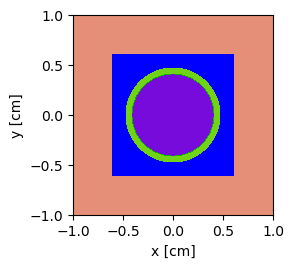

In [6]:
fr_a01.plot(width=(2.0, 2.0), origin=(0.0, 0.0, -60), colors={h301: 'silver', c291: 'blue', h341:'blue'})

***Tube Rod***

In [7]:
guide_t = openmc.Universe(name='coolant, guide tube', universe_id=10)
c21 = openmc.Cell(cell_id=21, fill=coolant, region=-c4)
c22 = openmc.Cell(cell_id=22, fill=guide_tube, region=+c4 & -c5)
c23 = openmc.Cell(cell_id=23, fill=coolant, region=+c5 & h)
h401 = openmc.Cell(cell_id=401, fill=htp, region= ~h & +s5 & -s6)
h411 = openmc.Cell(cell_id=411, fill=hmp, region= ~h & +s7 & -s8)
h421 = openmc.Cell(cell_id=421, fill=hmp, region= ~h & +s9 & -s10)
h431 = openmc.Cell(cell_id=431, fill=hmp, region= ~h & +s11 & -s12)
h441 = openmc.Cell(cell_id=441, fill=hmp, region= ~h & +s13 & -s14)
h451 = openmc.Cell(cell_id=451, fill=coolant, region= +c5 & -s5)
h461 = openmc.Cell(cell_id=461, fill=coolant, region= +c5 & +s6 & -s7)
h471 = openmc.Cell(cell_id=471, fill=coolant, region= +c5 & +s8 & -s9)
h481 = openmc.Cell(cell_id=481, fill=coolant, region= +c5 & +s10 & -s11)
h491 = openmc.Cell(cell_id=491, fill=coolant, region= +c5 & +s12 & -s13)
h4101 = openmc.Cell(cell_id=4101, fill=coolant, region= +c5 & +s14)
guide_t.add_cells((c21, c22, c23, h401, h411, h421, h431, h441, h451, h461, h471, h481, h491, h4101))

inst_t = openmc.Universe(name='coolant, instrumentation tube', universe_id=11)
c24 = openmc.Cell(cell_id=24, fill=coolant, region=-c4)
c25 = openmc.Cell(cell_id=25, fill=instrument_tube, region=+c4 & -c5)
c26 = openmc.Cell(cell_id=26, fill=coolant, region=+c5 & h)
h402 = openmc.Cell(cell_id=402, fill=htp, region= ~h & +s5 & -s6)
h412 = openmc.Cell(cell_id=412, fill=hmp, region= ~h & +s7 & -s8)
h422 = openmc.Cell(cell_id=422, fill=hmp, region= ~h & +s9 & -s10)
h432 = openmc.Cell(cell_id=432, fill=hmp, region= ~h & +s11 & -s12)
h442 = openmc.Cell(cell_id=442, fill=hmp, region= ~h & +s13 & -s14)
h452 = openmc.Cell(cell_id=452, fill=coolant, region= +c5 & -s5)
h462 = openmc.Cell(cell_id=462, fill=coolant, region= +c5 & +s6 & -s7)
h472 = openmc.Cell(cell_id=472, fill=coolant, region= +c5 & +s8 & -s9)
h482 = openmc.Cell(cell_id=482, fill=coolant, region= +c5 & +s10 & -s11)
h492 = openmc.Cell(cell_id=492, fill=coolant, region= +c5 & +s12 & -s13)
h4102 = openmc.Cell(cell_id=4102, fill=coolant, region= +c5 & +s14)
inst_t.add_cells((c24, c25, c26, h402, h412, h422, h432, h442, h452, h462, h472, h482, h492, h4102))

***Position of Fuel and Tube***

In [8]:
# Set positions occupied by mixed UO2-Gd2O3

# ugd_x = np.array([6, 10, 2, 14, 4, 12, 7, 9, 1, 15, 5, 11, 5, 11, 1, 15, 7, 9, 4, 12, 2, 14, 6, 10]) #24
# ugd_y = np.array([1, 1, 2, 2, 4, 4, 5, 5, 6, 6, 7, 7, 9, 9, 10, 10, 11, 11, 12, 12, 14, 14, 15, 15]) #24

ugd_x24 = np.array([6, 10, 7, 9, 1, 15, 5, 11, 5, 11, 1, 15, 7, 9, 6, 10]) #24
ugd_y24 = np.array([1, 1, 5, 5, 6, 6, 7, 7, 9, 9, 10, 10, 11, 11, 15, 15]) #24

ugd_xn24 = np.array([2, 14, 4, 12, 4, 12, 2, 14]) #24n
ugd_yn24 = np.array([2, 2, 4, 4, 12, 12, 14, 14]) #24n

# ugd_x = np.array([6, 10, 2, 14, 4, 12, 4, 12, 2, 14, 6, 10, 1, 15, 1, 15]) #24
# ugd_y = np.array([1, 1, 2, 2, 4, 4, 12, 12, 14, 14, 15, 15, 6, 6, 10, 10]) #24

# ugd_xn = np.array([7, 9, 7, 9, 5, 11, 5, 11]) #24n
# ugd_yn = np.array([5, 5, 11, 11, 7, 7, 9, 9]) #24n

ugd_x28 = np.array([1, 5, 11, 15, 7, 9, 1, 15, 3, 13, 3, 13, 1, 15, 7, 9, 1, 5, 11, 15]) #28
ugd_y28 = np.array([1, 1, 1, 1, 3, 3, 5, 5, 7, 7, 9, 9, 11, 11, 13, 13, 15, 15, 15, 15]) #28

ugd_xn28 = np.array([4, 12, 7, 9, 7, 9, 4, 12]) #28n
ugd_yn28 = np.array([4, 4, 7, 7, 9, 9, 12, 12]) #28n

# ugd_x = np.array([4, 7, 9, 12, 2, 14, 4, 12, 4, 12, 2, 14, 4, 7, 9, 12]) #32-1
# ugd_y = np.array([2, 2, 2, 2, 4, 4, 6, 6, 10, 10, 12, 12, 14, 14, 14, 14]) #32-1

# ugd_xn = np.array([2, 14, 6, 10, 8, 2, 14, 6, 10, 2, 14, 8, 6, 10, 2, 14]) #32n-1
# ugd_yn = np.array([2, 2, 4, 4, 6, 7, 7, 8, 8, 9, 9, 10, 12, 12, 14, 14]) #32n-1

# ugd_x32 = np.array([2, 14, 4, 7, 9, 12, 2, 14, 2, 14, 4, 7, 9, 12, 2, 14, 2, 14, 2, 14]) #32-2
# ugd_y32 = np.array([2, 2, 2, 2, 2, 2, 4, 4, 12, 12, 14, 14, 14, 14, 7, 7, 9, 9, 14, 14]) #32-2

# ugd_xn32 = np.array([6, 10, 4, 8, 12, 6, 10, 4, 8, 12, 6, 10]) #32n-2
# ugd_yn32 = np.array([4, 4, 6, 6, 6, 8, 8, 10, 10, 10, 12, 12]) #32n-2

##################################################################################################################################################

# ugd_x28 = np.array([1, 5, 11, 15, 7, 9, 4, 12, 1, 15, 3, 7, 9, 13, 3, 7, 9, 13, 1, 15, 4, 12, 7, 9, 1, 5, 11, 15]) #28
# ugd_y28 = np.array([1, 1, 1, 1, 3, 3, 4, 4, 5, 5, 7, 7, 7, 7, 9, 9, 9, 9, 11, 11, 12, 12, 13, 13, 15, 15, 15, 15]) #28

# Set positions occupied by guide tubes
gtube_x = np.array([5, 8, 11, 3, 13, 2, 5, 8, 11, 14, 2, 5, 11, 14,
   2, 5, 8, 11, 14, 3, 13, 5, 8, 11])
gtube_y = np.array([2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 8, 8, 8, 8,
   11, 11, 11, 11, 11, 13, 13, 14, 14, 14])

# Set positions occupied by instrumentation tube
itube_x = np.array([8])
itube_y = np.array([8])

***Define Fuel Lattices***

In [9]:
l1001 = openmc.RectLattice(name='Fuel assembly A01', lattice_id=1001)
l1001.lower_left = (-21.504/2, -21.504/2)
l1001.pitch = (21.504/17, 21.504/17)
l1001.universes = np.tile(fr_a01, (17, 17))
l1001.universes[ugd_y28, ugd_x28] = fr_mix90
l1001.universes[ugd_yn28, ugd_xn28] = fr_mixn
l1001.universes[gtube_x, gtube_y] = guide_t
l1001.universes[itube_x, itube_y] = inst_t

l1002 = openmc.RectLattice(name='Fuel assembly A02', lattice_id=1002)
l1002.lower_left = (-21.504/2, -21.504/2)
l1002.pitch = (21.504/17, 21.504/17)
l1002.universes = np.tile(fr_a02, (17, 17))
l1002.universes[ugd_y28, ugd_x28] = fr_mix90
l1002.universes[ugd_yn28, ugd_xn28] = fr_mixn
l1002.universes[gtube_x, gtube_y] = guide_t
l1002.universes[itube_x, itube_y] = inst_t

l1003 = openmc.RectLattice(name='Fuel assembly B01', lattice_id=1003)
l1003.lower_left = (-21.504/2, -21.504/2)
l1003.pitch = (21.504/17, 21.504/17)
l1003.universes = np.tile(fr_b01, (17, 17))
l1003.universes[ugd_y24, ugd_x24] = fr_mix90
l1003.universes[ugd_yn24, ugd_xn24] = fr_mixn
l1003.universes[gtube_x, gtube_y] = guide_t
l1003.universes[itube_x, itube_y] = inst_t

l1004 = openmc.RectLattice(name='Fuel assembly B02', lattice_id=1004)
l1004.lower_left = (-21.504/2, -21.504/2)
l1004.pitch = (21.504/17, 21.504/17)
l1004.universes = np.tile(fr_b02, (17, 17))
l1004.universes[ugd_y24, ugd_x24] = fr_mix90
l1004.universes[ugd_yn24, ugd_xn24] = fr_mixn
l1004.universes[gtube_x, gtube_y] = guide_t
l1004.universes[itube_x, itube_y] = inst_t

l1005 = openmc.RectLattice(name='Fuel assembly C01', lattice_id=1005)
l1005.lower_left = (-21.504/2, -21.504/2)
l1005.pitch = (21.504/17, 21.504/17)
l1005.universes = np.tile(fr_c01, (17, 17))
l1005.universes[ugd_y24, ugd_x24] = fr_mix90
l1005.universes[ugd_yn24, ugd_xn24] = fr_mixn
l1005.universes[gtube_x, gtube_y] = guide_t
l1005.universes[itube_x, itube_y] = inst_t

l1006 = openmc.RectLattice(name='Fuel assembly C02', lattice_id=1006)
l1006.lower_left = (-21.504/2, -21.504/2)
l1006.pitch = (21.504/17, 21.504/17)
l1006.universes = np.tile(fr_c02, (17, 17))
l1006.universes[ugd_y24, ugd_x24] = fr_mix90
l1006.universes[ugd_yn24, ugd_xn24] = fr_mixn
l1006.universes[gtube_x, gtube_y] = guide_t
l1006.universes[itube_x, itube_y] = inst_t

l1007 = openmc.RectLattice(name='Fuel assembly C03', lattice_id=1007)
l1007.lower_left = (-21.504/2, -21.504/2)
l1007.pitch = (21.504/17, 21.504/17)
l1007.universes = np.tile(fr_c03, (17, 17))
l1007.universes[ugd_y24, ugd_x24] = fr_mix90
l1007.universes[ugd_yn24, ugd_xn24] = fr_mixn
l1007.universes[gtube_x, gtube_y] = guide_t
l1007.universes[itube_x, itube_y] = inst_t

***Fuel Assembly***

In [10]:
fa_r = openmc.Universe(name='reflector assembly ', universe_id=12)
c50 = openmc.Cell(cell_id=50, fill=ref, region= +p110 & -p3) 
fa_r.add_cell(c50)

fa_a01 = openmc.Universe(name='A-01', universe_id=61)
c601 = openmc.Cell(cell_id=601, fill=l1001, region=+p110 & -p3)
fa_a01.add_cell(c601)

fa_a02 = openmc.Universe(name='A-02', universe_id=62)
c602 = openmc.Cell(cell_id=602, fill=l1002, region=+p110 & -p3)
fa_a02.add_cell(c602)

fa_b01 = openmc.Universe(name='B-01', universe_id=63)
c603 = openmc.Cell(cell_id=603, fill=l1003, region=+p110 & -p3)
fa_b01.add_cell(c603)

fa_b02 = openmc.Universe(name='B-02', universe_id=64)
c604 = openmc.Cell(cell_id=604, fill=l1004, region=+p110 & -p3)
fa_b02.add_cell(c604)

fa_c01 = openmc.Universe(name='C-01', universe_id=65)
c605 = openmc.Cell(cell_id=605, fill=l1005, region=+p110 & -p3)
fa_c01.add_cell(c605)

fa_c02 = openmc.Universe(name='C-02', universe_id=66)
c606 = openmc.Cell(cell_id=606, fill=l1006, region=+p110 & -p3)
fa_c02.add_cell(c606)

fa_c03 = openmc.Universe(name='C-03', universe_id=67)
c607 = openmc.Cell(cell_id=607, fill=l1007, region=+p110 & -p3)
fa_c03.add_cell(c607)

***Define Core Lattices***

In [11]:
l200 = openmc.RectLattice(name='Core lattice (lower half)', lattice_id=200)
l200.lower_left = (-21.504*21/2, -21.504*21/2)
l200.pitch = (21.504, 21.504)
l200.universes = [
[fa_r]*21,
[fa_r]*21,
[fa_r]*7 + [fa_r]*7 + [fa_r]*7,
[fa_r]*5 + [fa_r]*11 + [fa_r]*5,
[fa_r]*4 + [fa_r]*13 + [fa_r]*4,
[fa_r]*3 + [fa_r]*15 + [fa_r]*3,
[fa_r]*3 + [fa_r]*15 + [fa_r]*3,
[fa_r]*9 + [fa_b01,fa_c02,fa_b01] + [fa_r]*9,   ## nuscale core 1
[fa_r]*8 + [fa_b02,fa_c01,fa_a02,fa_c01,fa_b02] + [fa_r]*8,   ## nuscale core 2
[fa_r]*7 + [fa_b01,fa_c01,fa_a01,fa_a01,fa_a01,fa_c01,fa_b01] + [fa_r]*7,   ## nuscale core 3
[fa_r]*7 + [fa_c02,fa_a02,fa_a01,fa_c03,fa_a01,fa_a02,fa_c02] + [fa_r]*7,   ## nuscale core 4
[fa_r]*7 + [fa_b01,fa_c01,fa_a01,fa_a01,fa_a01,fa_c01,fa_b01] + [fa_r]*7,   ## nuscale core 5
[fa_r]*8 + [fa_b02,fa_c01,fa_a02,fa_c01,fa_b02] + [fa_r]*8,   ## nuscale core 6
[fa_r]*9 + [fa_b01,fa_c02,fa_b01] + [fa_r]*9,   ## nuscale core 7
[fa_r]*3 + [fa_r]*15 + [fa_r]*3,
[fa_r]*3 + [fa_r]*15 + [fa_r]*3,
[fa_r]*4 + [fa_r]*13 + [fa_r]*4,
[fa_r]*5 + [fa_r]*11 + [fa_r]*5,
[fa_r]*7 + [fa_r]*7 + [fa_r]*7,
[fa_r]*21,
[fa_r]*21]

***Define Root Universes***

In [12]:
root = openmc.Universe(universe_id=111, name='root universe')
c31 = openmc.Cell(cell_id=31, fill=l200, region=-c7 & -p3 & +p110)
c32 = openmc.Cell(cell_id=32, fill=top_nozzle, region=-c6 & +p3 & -p2)
c33 = openmc.Cell(cell_id=33, fill=bot_nozzle, region=-c6 & -p110 & +p9)
c34 = openmc.Cell(cell_id=34, fill=ref, region=-c7 & +p2 & -p1)
c35 = openmc.Cell(cell_id=35, fill=ref, region=-c7 & -p9 & +p10)
c36 = openmc.Cell(cell_id=36, fill=ref, region=-c7 & +c6 & -p2 & +p10)
c37 = openmc.Cell(cell_id=37, fill=bot_plate, region=+c6 & -c7 & +p1 & -p0)
c38 = openmc.Cell(cell_id=38, fill=bot_plate, region=+c6 & -c7 & -p10 & +p11)
c39 = openmc.Cell(cell_id=39, fill=coolant, region=-c6 & +p1 & -p0)
c40 = openmc.Cell(cell_id=40, fill=coolant, region=-c6 & -p10 & +p11)
c41 = openmc.Cell(cell_id=41, fill=barrel, region=+c7 & -c8 & -p0 & +p11)
c42 = openmc.Cell(cell_id=42, fill=coolant, region=+c8 & -c9 & -p0 & +p11)
c43 = openmc.Cell(cell_id=43, fill=rpv_steel, region=+c9 & -c10 & -p0 & +p11)

root.add_cells((c31, c32, c33, c34, c35, c36, c37, c38, c39, c40, c41, c42, c43))
geometry = openmc.Geometry(root)
model.geometry.root_universe = root

In [13]:
plot1 = openmc.Plot()
plot1.origin = (0, 0, 0)
plot1.width = (350.0, 350.0)
plot1.pixels = (2000, 2000)
plot1.basis='xz'
plot1.color_by = 'material'
plot1.colors = {
    coolant : 'aqua',
    clad: 'orange',   # zirc:   gray
    fuelA01:       'yellow',   # fuelA01:  darkorange
    fuelA02:       'lemonchiffon',   # fuelA02:   wheat
    fuelB01:       'red',   # fuelB01:   red
    fuelB02:       'indianred',   # fuelB02:   lightcoral
    fuelC01:       'blue',   # fuelCO1:   darkblue
    fuelC02:       'slateblue',   # fuelC02:   slateblue
    fuelC03:       'skyblue',   # fuelC03:   biru muda
    gap:      'oldlace',    # void:   white
    ref: 'silver',
    htp: 'silver',
    hmp: 'silver',
    bot_plate : 'navy',
    barrel : 'darkorange',
    top_nozzle: 'lightcoral',
    bot_nozzle: 'lightcoral',
    rpv_steel : 'grey',
    plenum_spring: 'black',
    mixfueln: 'black',
    end_cap: 'dimgray',
    mixfuel90: 'springgreen',
    mixfuel70: 'springgreen',
    guide_tube: 'darkgray',
    instrument_tube: 'maroon',
}

In [14]:
plot2 = openmc.Plot()
plot2.origin = (0, 0, 0)
plot2.width = (350.0, 350.0)
plot2.pixels = (5000, 5000)
plot2.basis='xy'
plot2.color_by = 'material'
plot2.colors = {
    coolant : 'aqua',
    clad: 'orange',   # zirc:   gray
    fuelA01:       'yellow',   # fuelA01:  darkorange
    fuelA02:       'lemonchiffon',   # fuelA02:   wheat
    fuelB01:       'red',   # fuelB01:   red
    fuelB02:       'indianred',   # fuelB02:   lightcoral
    fuelC01:       'blue',   # fuelCO1:   darkblue
    fuelC02:       'slateblue',   # fuelC02:   slateblue
    fuelC03:       'skyblue',   # fuelC03:   biru muda
    gap:      'oldlace',    # void:   white
    ref: 'silver',
    htp: 'silver',
    hmp: 'silver',
    bot_plate : 'navy',
    barrel : 'darkorange',
    top_nozzle: 'lightcoral',
    bot_nozzle: 'lightcoral',
    rpv_steel : 'grey',
    plenum_spring: 'black',
    mixfueln: 'black',
    end_cap: 'dimgray',
    mixfuel90: 'springgreen',
    mixfuel70: 'springgreen',
    guide_tube: 'darkgray',
    instrument_tube: 'maroon',
    
}

In [15]:
model.plots.append(plot2)
model.plots.append(plot1)

In [16]:
model.export_to_xml()

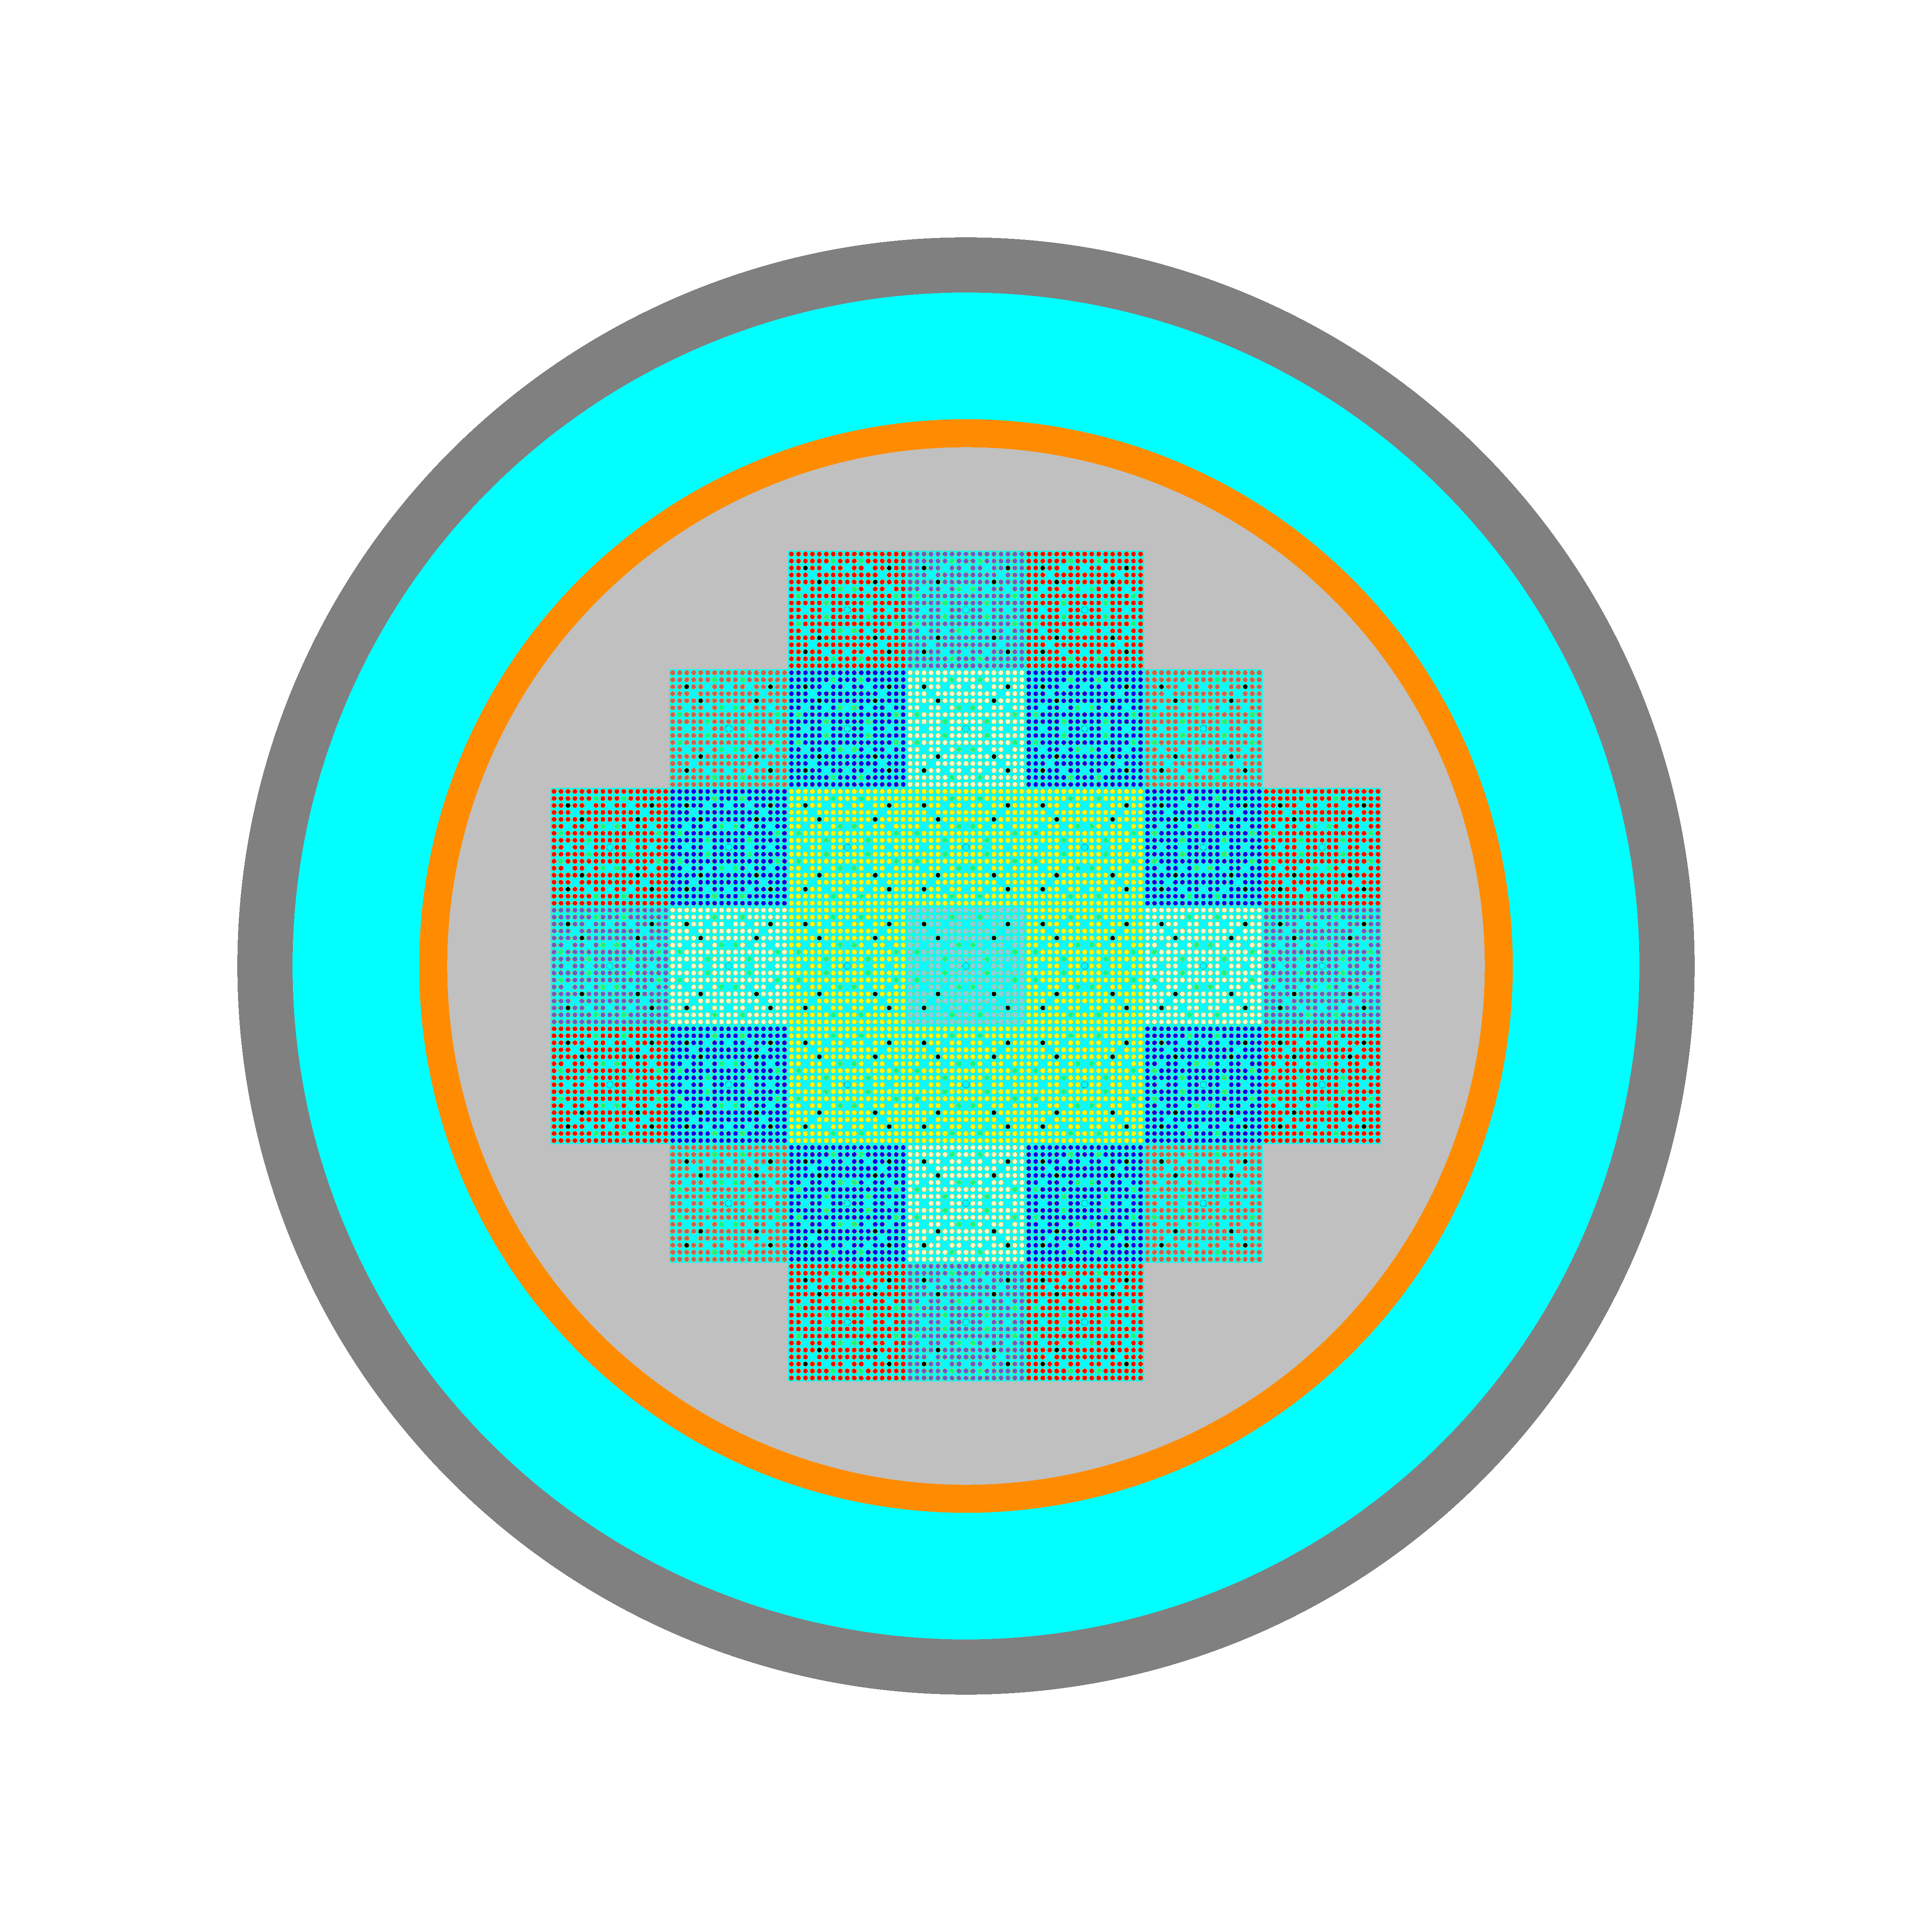

In [17]:
openmc.plot_inline(plot2)

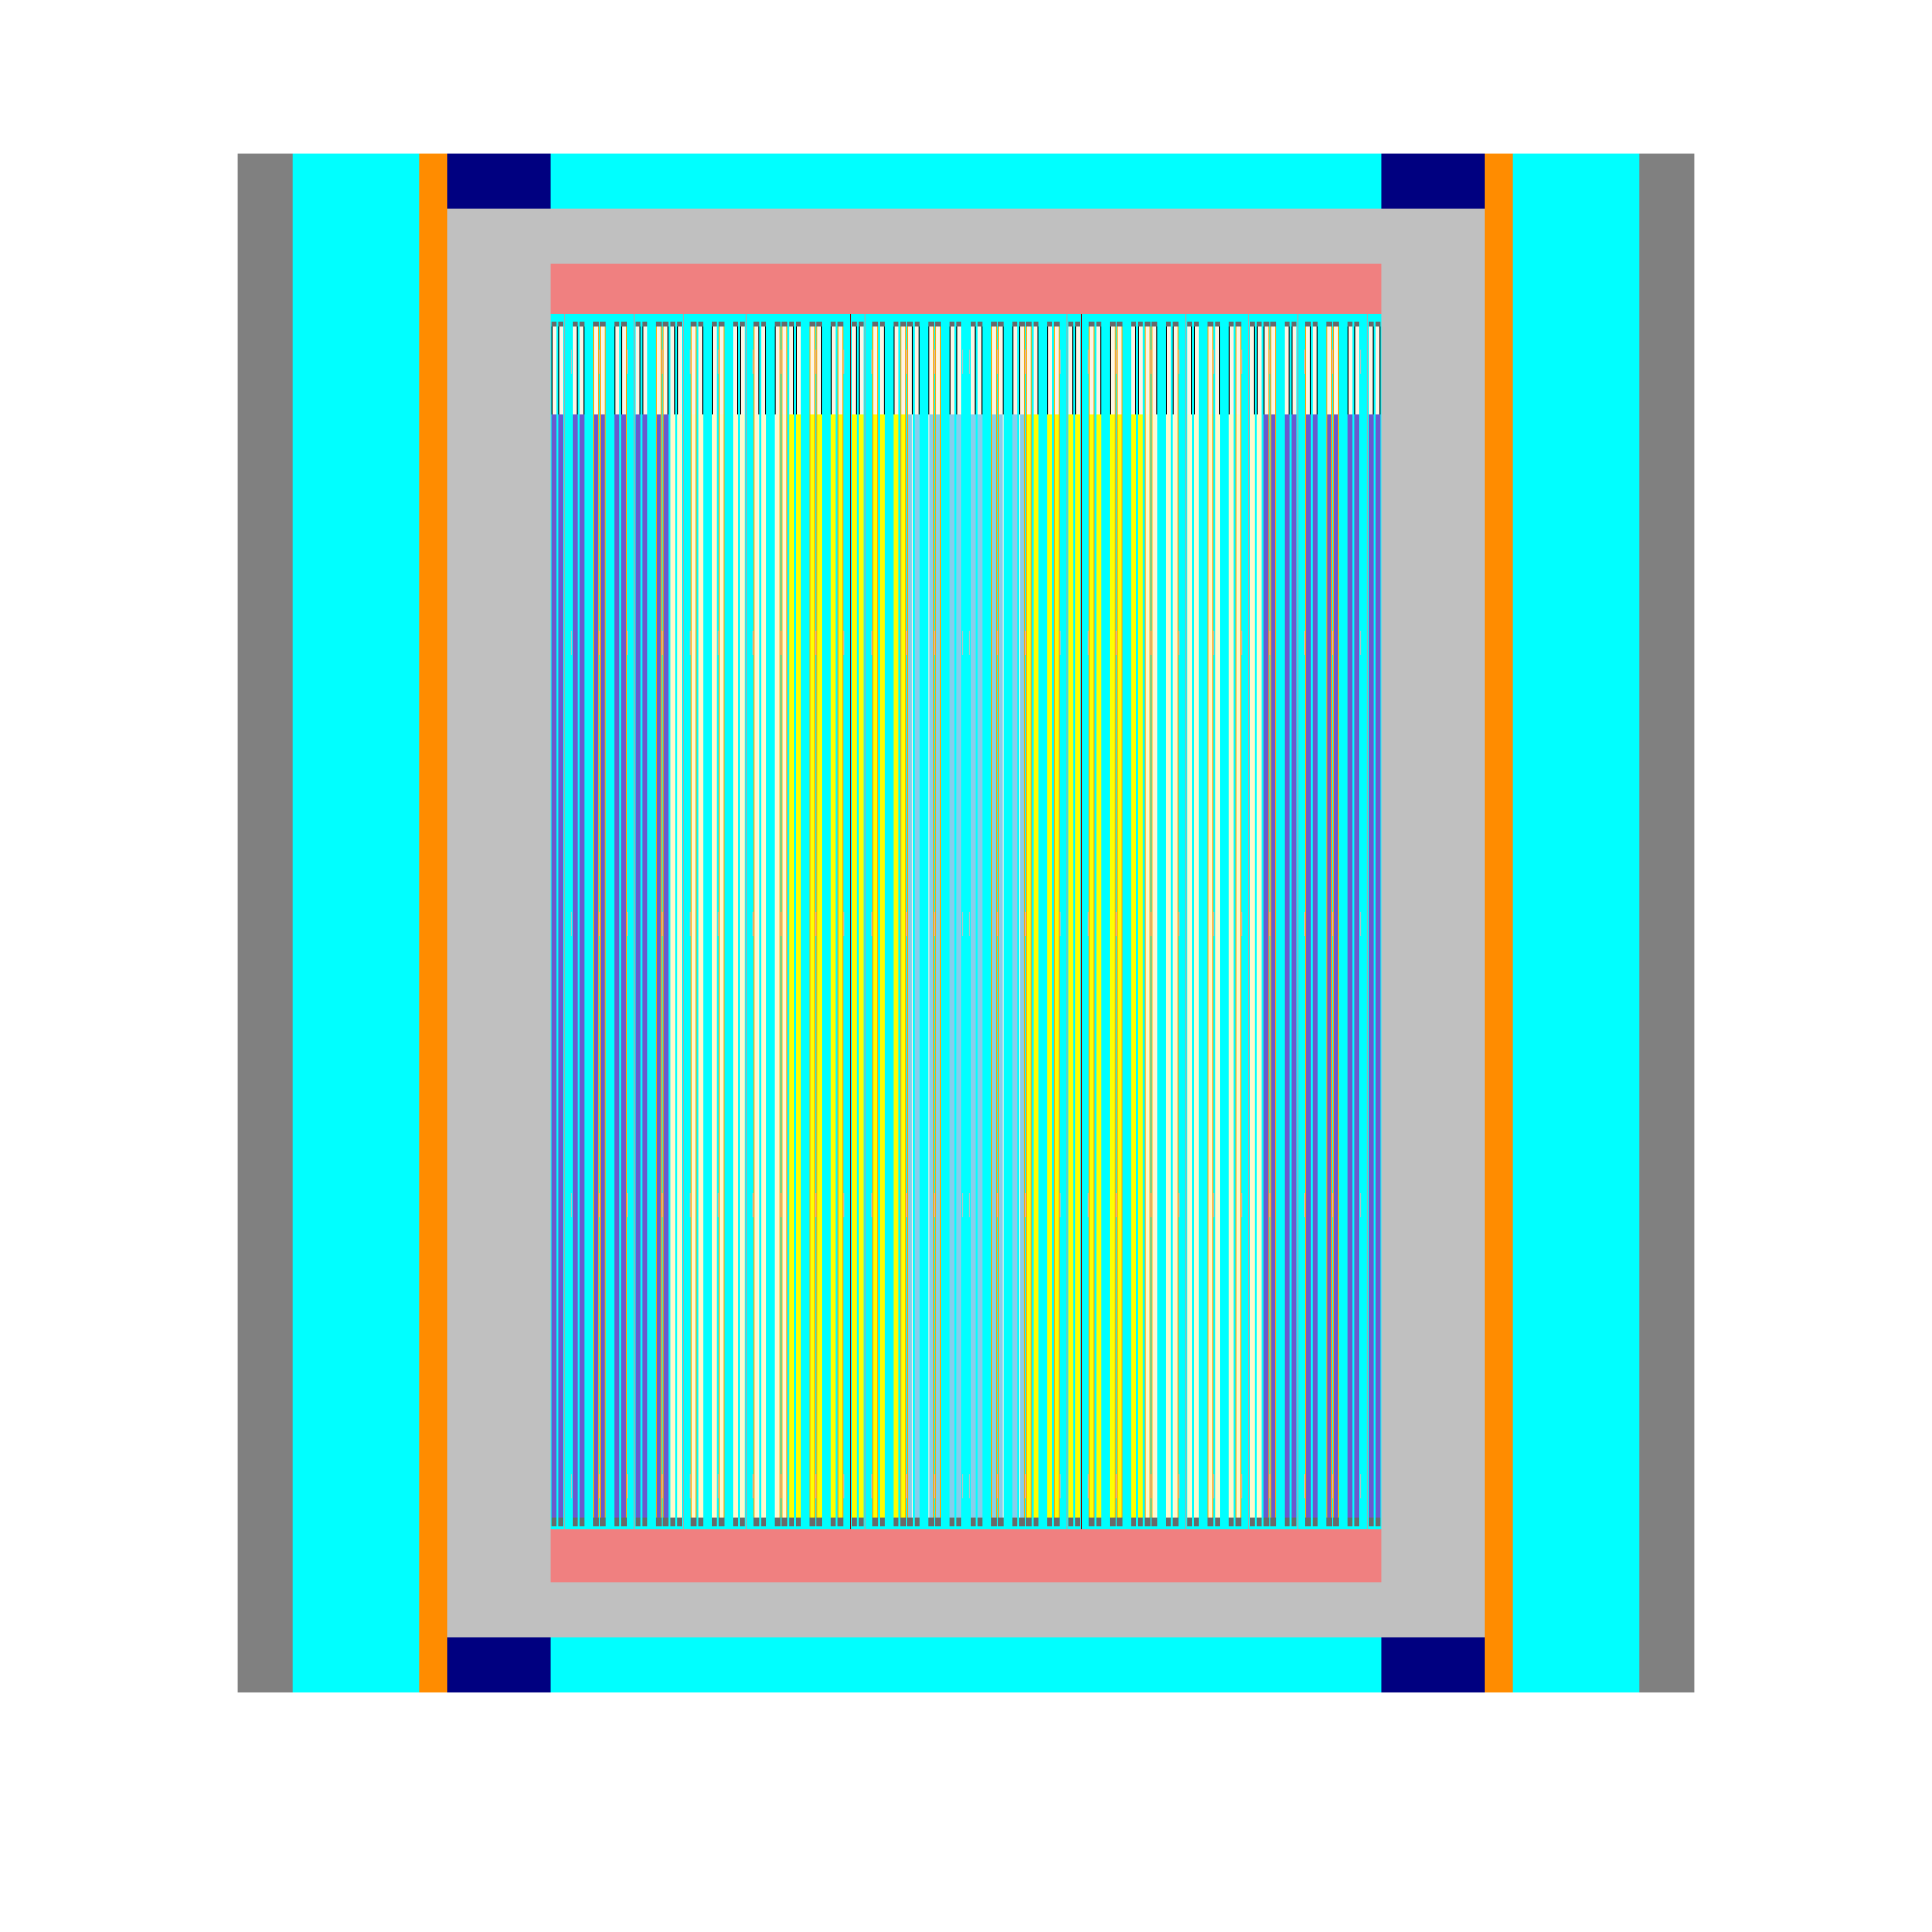

In [18]:
openmc.plot_inline(plot1)

In [19]:
model.settings.batches = 250
model.settings.inactive = 50
model.settings.particles = 10000
model.settings.output = {'tallies':True} 
model.settings.source = openmc.IndependentSource(space=openmc.stats.Box([-r6, -r6, -100], [r6, r6, 100]))

In [20]:
model.export_to_xml()

In [21]:
model.run()

[FADILA-MESIA:07501] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.FADILA-MESIA.1000/jf.0/677249024/shared_mem_cuda_pool.FADILA-MESIA could be created.
[FADILA-MESIA:07501] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%

PosixPath('/home/fadilamesia/PKM/fix/statepoint.250.h5')

In [21]:
import math
radii = [0.40575, 0.475]
radiii = [r00, 0.475]

In [22]:
# mixfuel.volume = math.pi * (radiii[0] ** 2) * 200 * 20 * 37
# mixfueln.volume = math.pi * (radiii[0] ** 2) * 200 * 12 * 37
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 8
# fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 4
# fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 8
# fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 4
# fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 8
# fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 4
# fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 232
# pao2.volume = (math.pi * (radii[0] ** 2) * 200 * 32 * 37) - (math.pi * (radiii[0] ** 2) * 200 * 32 * 37)

# mixfuel.volume = math.pi * (radii[0] ** 2) * 200 * 16 * 37
# mixfueln.volume = math.pi * (radiii[0] ** 2) * 200 * 8 * 37
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 240
# pao2.volume = (math.pi * (radii[0] ** 2) * 200 * 8 * 37) - (math.pi * (radiii[0] ** 2) * 200 * 8 * 37)

mixfuel90.volume = (math.pi * (radii[0] ** 2) * 200 * 16 * 25) + (math.pi * (radii[0] ** 2) * 200 * 20 * 12)
mixfueln.volume = (math.pi * (radiii[0] ** 2) * 200 * 8 * 37) 
fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 240
pao2.volume = (math.pi * (radii[0] ** 2) * 200 * 8 * 37) - (math.pi * (radiii[0] ** 2) * 200 * 8 * 37)

# mixfuel.volume = (math.pi * (radiii[0] ** 2) * 200 * 16 * 29) + (math.pi * (radiii[0] ** 2) * 200 * 20 * 8)
# mixfueln.volume = (math.pi * (radiii[0] ** 2) * 200 * 8 * 37)
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
# fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 240
# pao2.volume = ((math.pi * (radii[0] ** 2) * 200 * 24 * 29) - (math.pi * (radiii[0] ** 2) * 200 * 24 * 29)) + ((math.pi * (radii[0] ** 2) * 200 * 28 * 8) - (math.pi * (radiii[0] ** 2) * 200 * 28 * 8))

# mixfuel.volume = (math.pi * (radiii[0] ** 2) * 200 * 16 * 29) + (math.pi * (radiii[0] ** 2) * 200 * 20 * 8)
# mixfueln.volume = (math.pi * (radiii[0] ** 2) * 200 * 8 * 29) + (math.pi * (radiii[0] ** 2) * 200 * 12 * 8)
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 8
# fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 240
# pao2.volume = ((math.pi * (radii[0] ** 2) * 200 * 24 * 29) - (math.pi * (radiii[0] ** 2) * 200 * 24 * 29)) + ((math.pi * (radii[0] ** 2) * 200 * 32 * 8) - (math.pi * (radiii[0] ** 2) * 200 * 32 * 8))

# mixfuel.volume = math.pi * (radiii[0] ** 2) * 200 * 20 * 37
# mixfueln.volume = math.pi * (radiii[0] ** 2) * 200 * 8 * 37
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
# fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
# fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
# fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
# fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
# fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
# fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 236
# pao2.volume = (math.pi * (radii[0] ** 2) * 200 * 28 * 37) - (math.pi * (radiii[0] ** 2) * 200 * 28 * 37)

# mixfuel.volume = math.pi * (radiii[0] ** 2) * 200 * 20 * 21
# mixfueln.volume = (math.pi * (radiii[0] ** 2) * 200 * 8 * 21) + (math.pi * (radiii[0] ** 2) * 200 * 28 * 16)
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
# fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
# fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
# fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
# fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
# fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
# fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 236
# pao2.volume = (math.pi * (radii[0] ** 2) * 200 * 28 * 37) - (math.pi * (radiii[0] ** 2) * 200 * 28 * 37)

# mixfuel.volume = math.pi * (radiii[0] ** 2) * 200 * 20 * 21
# mixfueln.volume = (math.pi * (radiii[0] ** 2) * 200 * 12 * 21) + (math.pi * (radiii[0] ** 2) * 200 * 28 * 16)
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 8
# fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 4
# fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 8
# fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
# fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 232 * 8
# fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 236 * 4
# fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 232
# pao2.volume = ((math.pi * (radii[0] ** 2) * 200 * 32 * 21) - (math.pi * (radiii[0] ** 2) * 200 * 32 * 21)) + ((math.pi * (radii[0] ** 2) * 200 * 28 * 16) - (math.pi * (radiii[0] ** 2) * 200 * 28 * 16))

# # mixfuel.volume = math.pi * (radiii[0] ** 2) * 200 * 20 * 37
# mixfueln.volume = math.pi * (radiii[0] ** 2) * 200 * 24 * 37
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelA02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelB01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelB02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelC01.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 8
# fuelC02.volume = math.pi * (radii[0] ** 2) * 200 * 240 * 4
# fuelC03.volume = math.pi * (radii[0] ** 2) * 200 * 240
# pao2.volume = (math.pi * (radii[0] ** 2) * 200 * 24 * 37) - (math.pi * (radiii[0] ** 2) * 200 * 24 * 37)

# mixfuel.volume = math.pi * (radiii[0] ** 2) * 200 * 28
# fuelA01.volume = math.pi * (radii[0] ** 2) * 200 * 236
# pao2.volume = (math.pi * (radii[0] ** 2) * 200 * 28) - (math.pi * (radiii[0] ** 2) * 200 * 28)

In [24]:
chain = openmc.deplete.Chain.from_xml("/mgpfs/home/fmesia/chain_endfb80_pwr.xml")
#chain.nuclide_dic

In [25]:
Model = openmc.Model(geometry=model.geometry, settings=model.settings)
operator = openmc.deplete.CoupledOperator(Model, "/mgpfs/home/fmesia/chain_endfb80_pwr.xml")
mass = operator.heavy_metal/1000

In [26]:
mass

9241.563925557088

In [27]:
power = 250e6

In [28]:
time_steps = [1]*50
# time_steps = [10]*72

In [29]:
integrator = openmc.deplete.CECMIntegrator(operator, time_steps, power, timestep_units='MWd/kg')

In [30]:
import time
import tracemalloc
import psutil

In [31]:
# Start timing
start_time = time.monotonic()

# Start memory tracking
tracemalloc.start()
process = psutil.Process()

# Fungsi untuk mencetak penggunaan memori secara real-time
def print_memory_usage():
    mem = process.memory_info().rss / (1024 ** 2)  # Convert to MB
    print(f"Memory Usage: {mem:.2f} MB")

In [32]:
print_memory_usage()

Memory Usage: 383.14 MB


In [33]:
integrator.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

          favor of the model.xml file.


 Reading U238 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/U238.h5
 Reading U236 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/U236.h5
 Reading O16 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/O16.h5
 Reading O17 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/O17.h5
 Reading O18 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/O18.h5
 Reading Gd152 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd152.h5
 Reading Gd154 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd154.h5
 Reading Gd155 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd155.h5
 Reading Gd156 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd156.h5
 Reading Gd157 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd157.h5
 Reading Gd158 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd158.h5
 Reading Gd160 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd160.h5
 Reading He4 from /home/fadilamesia/endfb80/

 Reading Fe56 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Fe58.h5
 Reading Ni58 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ni58.h5
 Reading Ni60 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ni60.h5
 Reading Ni61 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ni61.h5
 Reading Ni62 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ni62.h5
 Reading Ni64 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ni64.h5
 Reading Cr50 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cr50.h5
 Reading Cr52 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cr52.h5
 Reading Cr53 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cr53.h5
 Reading Cr54 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cr54.h5
 Reading Ti46 from /home/fadilamesia/endfb80/endfb-v

 Reading Mg25 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mg25.h5
 Reading Mg26 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mg26.h5
 Reading Al26_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Al26_m1.h5
 Reading Si31 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Si31.h5
 Reading Si32 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Si32.h5
 Reading P31 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/P31.h5
 Reading S35 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/S35.h5
 Reading Cl35 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cl35.h5
 Reading Cl36 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cl36.h5
 Reading Cl37 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cl37.h5
 Reading Ar36 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ar36.h5


 Reading Ar37 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ar37.h5
 Reading Ar38 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ar38.h5
 Reading Ar39 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ar39.h5
 Reading Ar40 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ar40.h5
 Reading Ar41 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ar41.h5
 Reading K39 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/K39.h5
 Reading K40 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/K40.h5
 Reading K41 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/K41.h5
 Reading Ca40 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ca40.h5
 Reading Ca41 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ca41.h5
 Reading Ca42 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ca42.h5
 Reading Ca43 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ca43.h5
 Reading Ca44 from /home/fadilamesia/endfb80/endfb-viii.0-

 Reading Se80 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Se80.h5
 Reading Se81 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Se81.h5
 Reading Se82 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Se82.h5
 Reading Br79 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Br79.h5
 Reading Br80 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Br80.h5
 Reading Br81 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Br81.h5
 Reading Kr78 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Kr78.h5
 Reading Kr79 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Kr79.h5
 Reading Kr80 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Kr80.h5
 Reading Kr81 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Kr81.h5
 Reading Kr82 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Kr82.h5
 Reading Kr83 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Kr83.h5
 Reading Kr84 from /home/fadilamesia/endfb80/endfb-v

 Reading Mo92 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo92.h5
 Reading Mo93 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo93.h5
 Reading Mo94 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo94.h5
 Reading Mo95 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo95.h5
 Reading Mo96 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo96.h5
 Reading Mo97 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo97.h5
 Reading Mo98 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo98.h5
 Reading Mo99 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo99.h5


 Reading Mo100 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Mo100.h5
 Reading Tc98 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Tc98.h5
 Reading Tc99 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Tc99.h5
 Reading Ru96 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru96.h5
 Reading Ru97 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru97.h5
 Reading Ru98 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru98.h5
 Reading Ru99 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru99.h5
 Reading Ru100 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru100.h5
 Reading Ru101 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru101.h5
 Reading Ru102 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru102.h5
 Reading Ru103 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru103.h5
 Reading Ru104 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ru104.h5
 Reading Ru105 from /home/fadilamesia/en

          250K
          294K
          600K
          900K
          1200K
          2500K
          1200K
          2500K


 Reading Cd108 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd108.h5
 Reading Cd109 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd109.h5
 Reading Cd110 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd110.h5
 Reading Cd111 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd111.h5
 Reading Cd112 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd112.h5
 Reading Cd113 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd113.h5
 Reading Cd114 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd114.h5
 Reading Cd115_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd115_m1.h5
 Reading Cd116 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cd116.h5
 Reading In113 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/In113.h5
 Reading In114 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/In114.h5
 Reading In115 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/In115.h5
 Reading Sn113 from /

          1200K
          2500K


 Reading Sb121 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Sb121.h5
 Reading Sb122 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Sb122.h5
 Reading Sb123 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Sb123.h5
 Reading Sb124 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Sb124.h5
 Reading Sb125 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Sb125.h5
 Reading Sb126 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Sb126.h5
 Reading Te120 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te120.h5
 Reading Te121 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te121.h5


          1200K
          2500K


 Reading Te121_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te121_m1.h5
 Reading Te122 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te122.h5
 Reading Te123 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te123.h5
 Reading Te124 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te124.h5
 Reading Te125 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te125.h5
 Reading Te126 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te126.h5
 Reading Te127_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te127_m1.h5
 Reading Te128 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te128.h5
 Reading Te129_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te129_m1.h5
 Reading Te130 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te130.h5
 Reading Te131 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te131.h5
 Reading Te131_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Te131_m1.h5


 Reading I132 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/I132.h5
 Reading I132_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/I132_m1.h5
 Reading I133 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/I133.h5
 Reading I134 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/I134.h5
 Reading I135 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/I135.h5
 Reading Xe123 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Xe123.h5
 Reading Xe124 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Xe124.h5
 Reading Xe125 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Xe125.h5
 Reading Xe126 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Xe126.h5
 Reading Xe127 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Xe127.h5
 Reading Xe128 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Xe128.h5
 Reading Xe129 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Xe129.h5
 Reading Xe130 from /home/fadil

          2500K


 Reading Cs133 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cs133.h5
 Reading Cs134 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cs134.h5
 Reading Cs135 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cs135.h5
 Reading Cs136 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cs136.h5
 Reading Cs137 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cs137.h5
 Reading Ba130 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba130.h5
 Reading Ba131 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba131.h5


          1200K
          2500K


 Reading Ba132 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba132.h5
 Reading Ba133 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba133.h5
 Reading Ba134 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba134.h5
 Reading Ba135 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba135.h5
 Reading Ba136 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba136.h5
 Reading Ba137 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba137.h5
 Reading Ba138 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba138.h5
 Reading Ba139 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba139.h5
 Reading Ba140 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ba140.h5
 Reading La138 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/La138.h5
 Reading La139 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/La139.h5
 Reading La140 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/La140.h5
 Reading Ce136 from /home/fa

          1200K
          2500K


 Reading Gd153 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd153.h5
 Reading Gd159 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Gd159.h5
 Reading Tb158 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Tb158.h5
 Reading Tb159 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Tb159.h5
 Reading Tb160 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Tb160.h5
 Reading Tb161 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Tb161.h5
 Reading Dy154 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Dy154.h5
 Reading Dy155 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Dy155.h5
 Reading Dy156 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Dy156.h5
 Reading Dy157 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Dy157.h5
 Reading Dy158 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Dy158.h5
 Reading Dy159 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Dy159.h5
 Reading Dy160 from /home/fa

          1200K
          2500K


 Reading Yb169 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Yb169.h5
 Reading Yb170 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Yb170.h5
 Reading Yb171 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Yb171.h5
 Reading Yb172 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Yb172.h5


          1200K
          2500K
          1200K
          2500K
          1200K
          2500K


 Reading Yb173 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Yb173.h5
 Reading Yb174 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Yb174.h5
 Reading Yb175 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Yb175.h5


          1200K
          2500K
          1200K
          2500K


 Reading Yb176 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Yb176.h5
 Reading Lu175 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Lu175.h5
 Reading Lu176 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Lu176.h5
 Reading Hf174 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf174.h5


          1200K
          2500K


 Reading Hf175 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf175.h5
 Reading Hf176 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf176.h5
 Reading Hf177 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf177.h5
 Reading Hf178 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf178.h5
 Reading Hf179 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf179.h5
 Reading Hf180 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf180.h5
 Reading Hf181 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf181.h5
 Reading Hf182 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Hf182.h5
 Reading Ta180 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ta180.h5


          1200K
          2500K
          1200K
          2500K


 Reading Ta181 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ta181.h5
 Reading Ta182 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Ta182.h5
 Reading W180 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/W180.h5
 Reading W181 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/W181.h5
 Reading W182 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/W182.h5
 Reading W183 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/W183.h5
 Reading W184 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/W184.h5
 Reading W185 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/W185.h5
 Reading W186 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/W186.h5
 Reading Re185 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Re185.h5
 Reading Re186_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Re186_m1.h5
 Reading Re187 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Re187.h5
 Reading Os184 from /home/fadilames

          1200K


 Reading Cf252 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cf252.h5
 Reading Cf253 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cf253.h5
 Reading Cf254 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Cf254.h5
 Reading Es251 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Es251.h5
 Reading Es252 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Es252.h5
 Reading Es253 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Es253.h5
 Reading Es254 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Es254.h5
 Reading Es254_m1 from
 /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Es254_m1.h5
 Reading Es255 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Es255.h5
 Reading Fm255 from /home/fadilamesia/endfb80/endfb-viii.0-hdf5/neutron/Fm255.h5
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.    

In [34]:
# Hitung penggunaan memori setelah running
print_memory_usage()

Memory Usage: 5468.65 MB


In [35]:
# Stop timing
end_time = time.time()
elapsed_time = time.monotonic() - start_time

# Tampilkan hasil
print(f"\n Total Waktu Eksekusi: {elapsed_time/60:.2f} menit")


 Total Waktu Eksekusi: 433.88 menit


In [36]:
import matplotlib.pyplot as plt
import openmc
import openmc.deplete

In [37]:
results = openmc.deplete.Results("./depletion_results.h5")

In [38]:
time, k = results.get_keff()

In [39]:
time /= (24 * 60 * 60)

In [40]:
print(k)

[[1.04902890e+00 6.14043376e-04]
 [1.01687764e+00 5.66331479e-04]
 [1.01373693e+00 6.00800551e-04]
 [1.01085329e+00 5.58204087e-04]
 [1.00715008e+00 5.97380279e-04]
 [1.00532393e+00 6.02303208e-04]
 [1.00129641e+00 5.31137651e-04]
 [1.00158931e+00 5.72832469e-04]
 [1.00240943e+00 6.44775775e-04]
 [9.99411772e-01 5.68771510e-04]
 [9.97487231e-01 5.62658084e-04]
 [9.95922555e-01 5.63958649e-04]
 [9.94678513e-01 5.38830493e-04]
 [9.91778063e-01 6.23423141e-04]
 [9.87848668e-01 5.85129624e-04]
 [9.83536816e-01 5.66162486e-04]
 [9.77617563e-01 5.58455250e-04]
 [9.72389504e-01 5.74885884e-04]
 [9.65273927e-01 5.67523199e-04]]


In [41]:
print(time)

[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 330. 360. 390.
 420. 450. 480. 510. 540.]


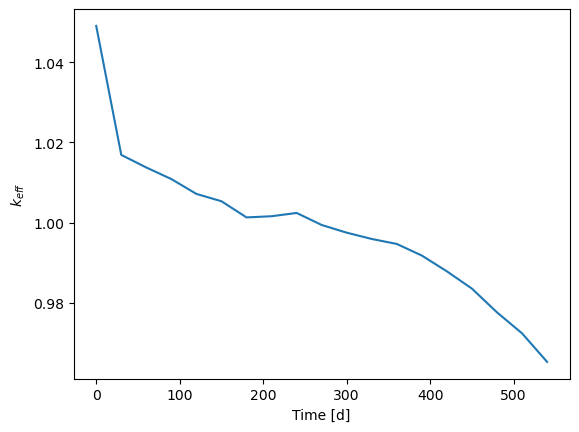

In [42]:
plt.plot(time, k[:, 0])
plt.xlabel("Time [d]")
plt.ylabel("$k_{eff}$");